# Ejercicio de Clasificación

## EDA - Análisis Exploratorio de Datos

### Descargar datos y librerías

In [1]:
# Librerías

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.impute import SimpleImputer
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import mglearn
import matplotlib
from statsmodels.stats.outliers_influence import variance_inflation_factor

- Descargar datos en 2 variables

In [2]:
archivo1 = pd.read_csv('C:/ProgramasML/ParcialMLUN/docs/train_identity.csv')
archivo2 = pd.read_csv('C:/ProgramasML/ParcialMLUN/docs/train_transaction.csv')

### Exploración y limpieza de datos

- Hacer merge para guardar los ambos archivos csv como un solo dataframe

In [3]:
datatrain = pd.merge(archivo1,archivo2, on='TransactionID', how='left')

- Descripción de tipos de variables

In [4]:
datatrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Columns: 434 entries, TransactionID to V339
dtypes: float64(399), int64(4), object(31)
memory usage: 477.6+ MB


Tenemos un conjunto de datos que se compone de 141.233 filas u observaciones con 433 columnas o características, 399 son reales (float), 4 son enteros y 31 tipo object.

In [5]:
columnas_enteras = datatrain.select_dtypes(include=['int']).columns.tolist()
# Imprimir las columnas enteras
for columna in columnas_enteras:
    print(columna)

TransactionID
isFraud
TransactionDT
card1


In [6]:
columnas_enteras = datatrain.select_dtypes(include=['object']).columns.tolist()
# Imprimir las columnas tipo object
for columna in columnas_enteras:
    print(columna)

id_12
id_15
id_16
id_23
id_27
id_28
id_29
id_30
id_31
id_33
id_34
id_35
id_36
id_37
id_38
DeviceType
DeviceInfo
ProductCD
card4
card6
P_emaildomain
R_emaildomain
M1
M2
M3
M4
M5
M6
M7
M8
M9


- Verificar la existencia datos faltantes en nuestro conjunto de datos.

Columnas y cantidad de datos nulos por columna:

In [7]:
datatrain.isnull().sum()

TransactionID        0
id_01                0
id_02             3361
id_03            77909
id_04            77909
                 ...  
V335             62192
V336             62192
V337             62192
V338             62192
V339             62192
Length: 434, dtype: int64

Porcentaje de datos nulos:

In [8]:
# Obtener la cantidad de valores nulos en cada columna
valores_nulos_por_columna = datatrain.isnull().sum()

# Filtrar las columnas que tienen valores nulos
columnas_con_datos_faltantes = valores_nulos_por_columna[valores_nulos_por_columna > 0]
columnas_sin_datos_faltantes = valores_nulos_por_columna[valores_nulos_por_columna == 0]

# Número total de filas en el DataFrame
numero_total_filas = len(datatrain)

# Imprimir las columnas con datos faltantes, la cantidad de valores nulos y el porcentaje de datos faltantes
print("Columnas con datos faltantes y % de datos faltantes")
for columna, cantidad_nulos in columnas_con_datos_faltantes.items():
    porcentaje_datos_faltantes = (cantidad_nulos / numero_total_filas) * 100
    print(f"Columna '{columna}': {cantidad_nulos} valores nulos ({porcentaje_datos_faltantes:.2f}%)")

Columnas con datos faltantes y % de datos faltantes
Columna 'id_02': 3361 valores nulos (2.33%)
Columna 'id_03': 77909 valores nulos (54.02%)
Columna 'id_04': 77909 valores nulos (54.02%)
Columna 'id_05': 7368 valores nulos (5.11%)
Columna 'id_06': 7368 valores nulos (5.11%)
Columna 'id_07': 139078 valores nulos (96.43%)
Columna 'id_08': 139078 valores nulos (96.43%)
Columna 'id_09': 69307 valores nulos (48.05%)
Columna 'id_10': 69307 valores nulos (48.05%)
Columna 'id_11': 3255 valores nulos (2.26%)
Columna 'id_13': 16913 valores nulos (11.73%)
Columna 'id_14': 64189 valores nulos (44.50%)
Columna 'id_15': 3248 valores nulos (2.25%)
Columna 'id_16': 14893 valores nulos (10.33%)
Columna 'id_17': 4864 valores nulos (3.37%)
Columna 'id_18': 99120 valores nulos (68.72%)
Columna 'id_19': 4915 valores nulos (3.41%)
Columna 'id_20': 4972 valores nulos (3.45%)
Columna 'id_21': 139074 valores nulos (96.42%)
Columna 'id_22': 139064 valores nulos (96.42%)
Columna 'id_23': 139064 valores nulos (9

In [9]:
print("Columnas sin datos faltantes")
for columna in columnas_sin_datos_faltantes.index:
    print(columna)

Columnas sin datos faltantes
TransactionID
id_01
id_12
isFraud
TransactionDT
TransactionAmt
ProductCD
card1
C1
C2
C3
C4
C5
C6
C7
C8
C9
C10
C11
C12
C13
C14


Después de verificar la cantidad de datos nulos en el dataset encontramos que muchas de las características tienen un gran porcentaje de datos o filas vacías, lo cual tiene sentido debido a que cada persona tiene diferente cantidad de direcciones o utiliza diferente cantidad de IP, ISP, Proxy, etc., en donde realiza o ha realizado transacciones. 

Con el fin de simplificar el análisis, procederemos a eliminar las columnas que tienen más del 70% de datos nulos. 

In [10]:
# Calcular el porcentaje de datos faltantes para cada columna
porcentaje_datos_faltantes = (valores_nulos_por_columna / numero_total_filas) * 100

# Definir un umbral del 30% para filtrar columnas
umbral = 30
# Filtrar las columnas que tienen más del 30% de datos nulos
columnas_a_eliminar = porcentaje_datos_faltantes[porcentaje_datos_faltantes > umbral].index

# Eliminar las columnas del DataFrame
datatrain = datatrain.drop(columns=columnas_a_eliminar)

In [11]:
datatrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Columns: 247 entries, TransactionID to V321
dtypes: float64(226), int64(4), object(17)
memory usage: 271.8+ MB


- Verificar duplicados

In [12]:
# Verificar filas duplicadas
duplicados = datatrain[datatrain.duplicated()]

# Mostrar las filas duplicadas
print("Filas duplicadas:")
print(duplicados)

Filas duplicadas:
Empty DataFrame
Columns: [TransactionID, id_01, id_02, id_05, id_06, id_11, id_12, id_13, id_15, id_16, id_17, id_19, id_20, id_28, id_29, id_31, id_35, id_36, id_37, id_38, DeviceType, DeviceInfo, isFraud, TransactionDT, TransactionAmt, ProductCD, card1, card2, card3, card4, card5, card6, P_emaildomain, R_emaildomain, C1, C2, C3, C4, C5, C6, C7, C8, C9, C10, C11, C12, C13, C14, D1, V95, V96, V97, V98, V99, V100, V101, V102, V103, V104, V105, V106, V107, V108, V109, V110, V111, V112, V113, V114, V115, V116, V117, V118, V119, V120, V121, V122, V123, V124, V125, V126, V127, V128, V129, V130, V131, V132, V133, V134, V135, V136, V137, V167, V168, V169, V170, V171, V172, V173, V174, ...]
Index: []

[0 rows x 247 columns]


No existen filas duplicadas dentro de nuestro dataframe.

- Completar datos faltantes

1. Columnas numéricas: Completar los datos faltantes de las columnas numéricas con la mediana

In [13]:
columnas_con_faltantes = datatrain.columns[datatrain.isnull().any()].tolist()

# Crear un imputador para variables numéricas con la mediana
imputador_numerico = SimpleImputer(strategy='median')

# Seleccionar las columnas numéricas
columnas_numericas = datatrain.select_dtypes(include=['int', 'float']).columns.tolist()

# Imputar valores faltantes en las columnas numéricas
datatrain[columnas_numericas] = imputador_numerico.fit_transform(datatrain[columnas_numericas])

2. Columnas tipo object

Verificaremos el porcentaje de datos faltantes en cada columna. 

In [14]:
# Obtener la cantidad de valores nulos en cada columna
valores_nulos_por_columna = datatrain.isnull().sum()

# Obtener el tipo de variable en cada columna
tipos_de_variable = datatrain.dtypes

# Filtrar las columnas que tienen valores nulos
columnas_con_datos_faltantes = valores_nulos_por_columna[valores_nulos_por_columna > 0]

# Número total de filas en el DataFrame
numero_total_filas = len(datatrain)

# Imprimir las columnas con datos faltantes, el tipo de variable, la cantidad de valores nulos y el porcentaje de datos faltantes
print("Columnas con datos faltantes, tipo de variable y % de datos faltantes")
for columna, cantidad_nulos in columnas_con_datos_faltantes.items():
    porcentaje_datos_faltantes = (cantidad_nulos / numero_total_filas) * 100
    tipo_variable = tipos_de_variable[columna]
    print(f"Columna '{columna}' ({tipo_variable}): {cantidad_nulos} valores nulos ({porcentaje_datos_faltantes:.2f}%)")

Columnas con datos faltantes, tipo de variable y % de datos faltantes
Columna 'id_15' (object): 3248 valores nulos (2.25%)
Columna 'id_16' (object): 14893 valores nulos (10.33%)
Columna 'id_28' (object): 3255 valores nulos (2.26%)
Columna 'id_29' (object): 3255 valores nulos (2.26%)
Columna 'id_31' (object): 3951 valores nulos (2.74%)
Columna 'id_35' (object): 3248 valores nulos (2.25%)
Columna 'id_36' (object): 3248 valores nulos (2.25%)
Columna 'id_37' (object): 3248 valores nulos (2.25%)
Columna 'id_38' (object): 3248 valores nulos (2.25%)
Columna 'DeviceType' (object): 3423 valores nulos (2.37%)
Columna 'DeviceInfo' (object): 25567 valores nulos (17.73%)
Columna 'card4' (object): 184 valores nulos (0.13%)
Columna 'card6' (object): 178 valores nulos (0.12%)
Columna 'P_emaildomain' (object): 13391 valores nulos (9.28%)
Columna 'R_emaildomain' (object): 13150 valores nulos (9.12%)


Con el fin de simplificar más el análisis se eliminarán las filas que no tengan datos en las siguientes columnas tipo object: 'DiviceInfo', 'id_16', 'R_emaildomain' y 'P_emaildomain'

In [15]:
# Crear una lista de las columnas
columnas_requeridas = ['DeviceInfo', 'id_16', 'R_emaildomain', 'P_emaildomain' ]

# Eliminar las filas que tienen valores faltantes en las columnas requeridas
datatrain = datatrain.dropna(subset=columnas_requeridas)

Verificar nuevamante el porcentaje de datos nulos en las columnas tipo object. 

In [16]:
# Obtener la cantidad de valores nulos en cada columna
valores_nulos_por_columna = datatrain.isnull().sum()

# Obtener el tipo de variable en cada columna
tipos_de_variable = datatrain.dtypes

# Filtrar las columnas que tienen valores nulos
columnas_con_datos_faltantes = valores_nulos_por_columna[valores_nulos_por_columna > 0]

# Número total de filas en el DataFrame
numero_total_filas = len(datatrain)

# Imprimir las columnas con datos faltantes, el tipo de variable, la cantidad de valores nulos y el porcentaje de datos faltantes
print("Columnas con datos faltantes, tipo de variable y % de datos faltantes")
for columna, cantidad_nulos in columnas_con_datos_faltantes.items():
    porcentaje_datos_faltantes = (cantidad_nulos / numero_total_filas) * 100
    tipo_variable = tipos_de_variable[columna]
    print(f"Columna '{columna}' ({tipo_variable}): {cantidad_nulos} valores nulos ({porcentaje_datos_faltantes:.2f}%)")

Columnas con datos faltantes, tipo de variable y % de datos faltantes
Columna 'id_31' (object): 118 valores nulos (0.12%)
Columna 'DeviceType' (object): 7 valores nulos (0.01%)
Columna 'card4' (object): 107 valores nulos (0.11%)
Columna 'card6' (object): 104 valores nulos (0.11%)


Completar los datos nulos en las columnas tipo object con la moda. 

In [17]:
# Crear un imputador para variables categóricas con la moda
imputador_categorico = SimpleImputer(strategy='most_frequent')

# Seleccionar las columnas categóricas
columnas_categoricas = datatrain.select_dtypes(include=['object']).columns.tolist()

# Imputar valores faltantes en las columnas categóricas
datatrain[columnas_categoricas] = imputador_categorico.fit_transform(datatrain[columnas_categoricas])

In [18]:
datatrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95389 entries, 2 to 144232
Columns: 247 entries, TransactionID to V321
dtypes: float64(230), object(17)
memory usage: 180.5+ MB


- Tabla de frecuencia y diagrama de barras para la varible respuesta.

El objetivo es detectar fraudes, nuestra variable de interés o respuesta es isFraud, en la cual **0** significa que No es una transacción fraudulenta y **1** significa que si lo es. 

In [19]:
datatrain.isFraud.value_counts()

isFraud
0.0    87760
1.0     7629
Name: count, dtype: int64

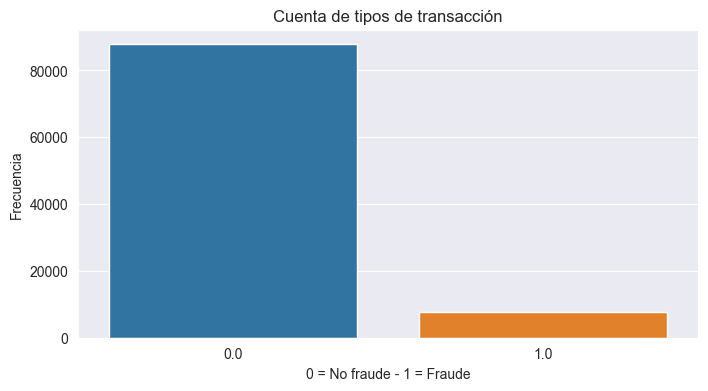

In [20]:
plt.figure(figsize=(8, 4))
plt.title('Cuenta de tipos de transacción')
sns.countplot(x='isFraud', data=datatrain)
plt.xlabel('0 = No fraude - 1 = Fraude')
plt.ylabel('Frecuencia')
plt.show()

Evidentemente nuestros datos se encuentran desbalanceados, lo cual es entendible debido a que la mayoría de las transacciones realizadas por nuestros usuarios son transacciones voluntarias. 

- Verificar correlación entre variables 

1. Varibles tipo objet

Verificar el número de la columa en la que está mi varible de interes

In [21]:
numero_columna = datatrain.columns.get_loc('isFraud')
print(numero_columna)

22


Explorar cuales son los datos que son tipo object

In [22]:
columnas_object = datatrain.select_dtypes(include=['object']).columns.tolist()
# Imprimir las columnas enteras
for columna in columnas_object:
    print(columna)

id_12
id_15
id_16
id_28
id_29
id_31
id_35
id_36
id_37
id_38
DeviceType
DeviceInfo
ProductCD
card4
card6
P_emaildomain
R_emaildomain


In [23]:
from scipy.stats import chi2_contingency

# Lista de variables categóricas
categorical_variables = datatrain.columns[datatrain.dtypes == 'object']

# Variable objetivo
target_variable = 'isFraud'

# Crear una lista para almacenar los resultados
results = []

# Calcular el chi-cuadrado y el valor p para cada combinación
for var in categorical_variables:
    if var != target_variable:
        contingency_table = pd.crosstab(datatrain[var], datatrain[target_variable])
        chi2, p, _, _ = chi2_contingency(contingency_table)
        results.append({'Variable': var, 'Chi-squared': chi2, 'p-value': p})

# Convertir la lista de resultados en un DataFrame
results_df = pd.DataFrame(results)

# Mostrar los resultados
print(results_df)


         Variable   Chi-squared        p-value
0           id_12     84.761981   3.365337e-20
1           id_15   1249.445589  1.095398e-273
2           id_16   1381.087878  2.704539e-302
3           id_28   1226.794642  9.164928e-269
4           id_29   1339.978145  2.320121e-293
5           id_31   3972.614564   0.000000e+00
6           id_35   1791.714815   0.000000e+00
7           id_36    129.124246   6.370326e-30
8           id_37    146.431767   1.044603e-33
9           id_38    182.004954   1.768767e-41
10     DeviceType    644.172222  4.135679e-142
11     DeviceInfo  16229.818436   0.000000e+00
12      ProductCD   1995.910934   0.000000e+00
13          card4    311.179561   3.784875e-67
14          card6    220.719191   1.178791e-48
15  P_emaildomain   2525.998473   0.000000e+00
16  R_emaildomain   2722.061481   0.000000e+00


De acuerdo con la tabla anterior de relación de variables categóricas con la variable objetivo, eliminaremos las variables con chi-cuadrado más pequeño y p-value grande, las cuales son: id_12, id_36, id_37, id_38, card4 y card6

In [24]:
# Crear una lista de las columnas
columnas_requeridas = ['id_12', 'id_36', 'id_37', 'id_38', 'card4', 'card6' ]

# Eliminar las filas que tienen valores faltantes en las columnas requeridas
datatrain = datatrain.dropna(subset=columnas_requeridas)

Pasar estas varibles tipo objects a variables numericas.

```{note}
Dado que al intentar hacerlo con todas las variables arrojaba un dataframe con más de 2000 columnas y aparece el error 'ErroMemory' que no permite que el algoritmo funcione, procederemos a verificar la cantidad de datos únicos que tiene cada variable tipo objet.
```

In [25]:
cantidad_datos_unicos = []  # Lista para almacenar la cantidad de datos únicos por columna
lista_datos_unicos = {}  # Diccionario para almacenar las listas de datos únicos por columna

categorical_variables = datatrain.columns[datatrain.dtypes == 'object']

for columna in categorical_variables:
    # Obtener la cantidad de datos únicos para la columna actual
    cantidad = len(datatrain[columna].unique())
    cantidad_datos_unicos.append((columna, cantidad))

# Imprimir la cantidad y lista de datos únicos por columna
for columna, cantidad in cantidad_datos_unicos:
    print(f"Columna '{columna}': Cantidad de datos únicos = {cantidad}")

Columna 'id_12': Cantidad de datos únicos = 2
Columna 'id_15': Cantidad de datos únicos = 2
Columna 'id_16': Cantidad de datos únicos = 2
Columna 'id_28': Cantidad de datos únicos = 2
Columna 'id_29': Cantidad de datos únicos = 2
Columna 'id_31': Cantidad de datos únicos = 123
Columna 'id_35': Cantidad de datos únicos = 2
Columna 'id_36': Cantidad de datos únicos = 2
Columna 'id_37': Cantidad de datos únicos = 2
Columna 'id_38': Cantidad de datos únicos = 2
Columna 'DeviceType': Cantidad de datos únicos = 2
Columna 'DeviceInfo': Cantidad de datos únicos = 1690
Columna 'ProductCD': Cantidad de datos únicos = 3
Columna 'card4': Cantidad de datos únicos = 4
Columna 'card6': Cantidad de datos únicos = 3
Columna 'P_emaildomain': Cantidad de datos únicos = 59
Columna 'R_emaildomain': Cantidad de datos únicos = 59


Con el fin de simplificar el análisis y poder realizar el VIF, eliminaremos las columnas 'DeviceInfo' e 'id_31', que son las variables que tienen mayor número de datos únicos que después de hacer el One Hot (dummies) se convertirán en columnas. 

In [26]:
datatrain = datatrain.drop('DeviceInfo',axis=1)
datatrain = datatrain.drop('id_31',axis=1)

```{note}
Al intentar hacer el VIF para reducir dimensionalidad aparece el error 'MemoryError' por ende, reduciremos la cantidad de filas. En este caso se tomo la decición de reducir de manera aleatoria la cantidad de filas que no son fraude, lo cual, paralelamente ayudará a reducir el desvalance de los datos
```

In [27]:
# Porcentaje de filas a mantener donde isFraud es igual a 10%
porcentaje_mantener = 0.1

# Filtrar el DataFrame para obtener solo las filas donde isFraud es igual a 1
data_fraud = datatrain[datatrain['isFraud'] == 1]

# Filtrar el DataFrame para obtener un porcentaje aleatorio de las filas donde isFraud es igual a 0
data_no_fraud = datatrain[datatrain['isFraud'] == 0].sample(frac=porcentaje_mantener, random_state=68)

# Combinar los DataFrames filtrados
data_red = pd.concat([data_fraud, data_no_fraud])


- Separar los datos entre data y target

In [28]:
# Separar los datos entre data y target
data_X = data_red.drop('isFraud', axis=1)
target = data_red['isFraud']

Aplicar One Hot (dummies) a las variables tipo objet que tenemos para codificarlas y poder usarlas para la creación y evaluación de los modelos de predicción.

In [29]:
# Crear una lista para almacenar los nombres de las nuevas variables dummies
nombres_nuevas_variables = []

# Obtener las columnas de tipo 'object'
columnas_object = data_X.select_dtypes(include=['object']).columns.tolist()

# Aplicar codificación one-hot y guardar los nombres de las nuevas variables
data = pd.get_dummies(data_X, columns=columnas_object, dummy_na=False, prefix=columnas_object)

# Obtener los nombres de las nuevas variables y agregarlos a la lista
nombres_nuevas_variables.extend(data.columns.tolist())

Convertir columnas resultantes del One Hot a binario, parar de True y False a 1 y 0

In [30]:
# Recorre las columnas específicas y convierte 'True' y 'False' a 1 y 0
columnas_a_convertir = [nombres_nuevas_variables]

for columna in columnas_a_convertir:
    data[columna] = data[columna].astype(int)

Aplicar VIF (*Variance Inflation Factor*) al dataframe que tenemos con el fin de reducir dimensionalidad por medio de la eliminación de columnas que están altamente correlacionadas. 

```{note}
Este es el código que se usó para hacer el VIF, dado que tardó aproximadamente 10 horas, los datos resultantes fueron descargados como un archivo .csv y a partir de este momento utilizaremos ese archivo. 


# Función para calcular el VIF para cada variable

def calculate_vif(data_frame):

    vif_data = pd.DataFrame()

    vif_data['Variable'] = data_frame.columns

    vif_data['VIF'] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]

    return vif_data

# Loop para calcular el VIF y eliminar variables con alto VIF

threshold = 5  # Umbral para considerar un alto VIF

while True:

    vif_df = calculate_vif(data)

    max_vif = vif_df['VIF'].max()

    if max_vif > threshold:

        # Encuentra la variable con el VIF más alto

        variable_to_remove = vif_df[vif_df['VIF'] == max_vif]['Variable'].iloc[0]

        print(f"Eliminando variable '{variable_to_remove}' con VIF = {max_vif}")

        data = data.drop(columns=[variable_to_remove])

    else:

        break

# El DataFrame 'data' ahora contiene las variables resultantes después de la reducción
data.info()
```

In [31]:
data = pd.read_csv('C:/ProgramasML/ParcialMLUN/docs/dataVIF.csv')

In [32]:
data.describe()

id_01          id_02         id_05         id_06         id_11  \
count  16405.000000   16405.000000  16405.000000  16405.000000  16405.000000   
mean     -11.539653  195595.374398      1.654922     -7.764279     99.771533   
std       17.052198  164120.901192      5.421963     17.522378      1.086137   
min     -100.000000     603.000000    -38.000000   -100.000000     90.000000   
25%      -10.000000   82669.000000      0.000000     -8.000000    100.000000   
50%       -5.000000  144260.000000      0.000000      0.000000    100.000000   
75%       -5.000000  253654.000000      1.000000      0.000000    100.000000   
max        0.000000  998295.000000     44.000000      0.000000    100.000000   

              id_13         id_17         id_19        id_20  TransactionDT  \
count  16405.000000  16405.000000  16405.000000  16405.00000   1.640500e+04   
mean      48.493935    193.956842    346.994270    414.39171   6.718439e+06   
std       10.805096     31.234724    132.949604    147.94828   4.694878e+06   
min       11.000000    100.000000    100.000000    100.00000   8.777500e+04   
25%       49.000000    166.000000    266.000000    305.00000   2.170411e+06   
50%       52.000000    166.000000    321.000000    484.00000   5.946265e+06   
75%       52.000000    225.000000    427.000000    549.00000   1.054287e+07   
max       64.000000    228.000000    669.000000    657.00000   1.581088e+07   

       ...  R_emaildomain_web.de  R_emaildomain_windstream.net  \
count  ...          16405.000000                  16405.000000   
mean   ...              0.000792                      0.000183   
std    ...              0.028140                      0.013522   
min    ...              0.000000                      0.000000   
25%    ...              0.000000                      0.000000   
50%    ...              0.000000                      0.000000   
75%    ...              0.000000                      0.000000   
max    ...              1.000000                      1.000000   

       R_emaildomain_yahoo.co.jp  R_emaildomain_yahoo.co.uk  \
count               16405.000000               16405.000000   
mean                    0.000183                   0.000305   
std                     0.013522                   0.017456   
min                     0.000000                   0.000000   
25%                     0.000000                   0.000000   
50%                     0.000000                   0.000000   
75%                     0.000000                   0.000000   
max                     1.000000                   1.000000   

       R_emaildomain_yahoo.com  R_emaildomain_yahoo.com.mx  \
count             16405.000000                16405.000000   
mean                  0.073392                    0.004389   
std                   0.260787                    0.066105   
min                   0.000000                    0.000000   
25%                   0.000000                    0.000000   
50%                   0.000000                    0.000000   
75%                   0.000000                    0.000000   
max                   1.000000                    1.000000   

       R_emaildomain_yahoo.de  R_emaildomain_yahoo.es  R_emaildomain_yahoo.fr  \
count            16405.000000            16405.000000            16405.000000   
mean                 0.000244                0.000366                0.000610   
std                  0.015614                0.019121                0.024683   
min                  0.000000                0.000000                0.000000   
25%                  0.000000                0.000000                0.000000   
50%                  0.000000                0.000000                0.000000   
75%                  0.000000                0.000000                0.000000   
max                  1.000000                1.000000                1.000000   

       R_emaildomain_ymail.com  
count             16405.000000  
mean                  0.001341  
std                   0.036597

- Verificar distribución de los datos posterior VIF y disminución de filas.

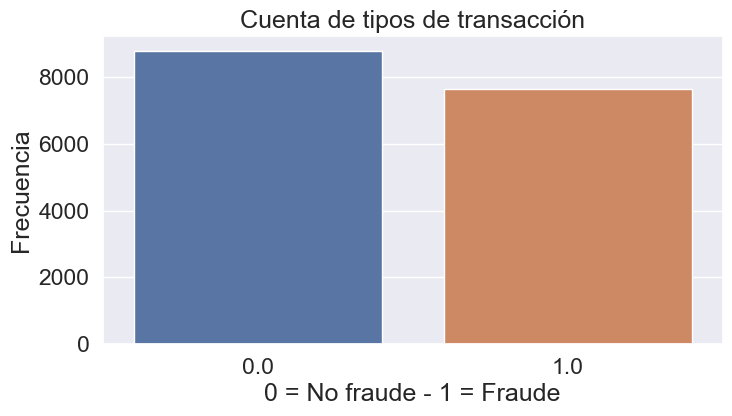

In [33]:
dataunion = pd.concat([target, data],axis=1)
sns.set(font_scale=1.5)
plt.figure(figsize=(8, 4))
plt.title('Cuenta de tipos de transacción')
sns.countplot(x='isFraud', data=dataunion)
plt.xlabel('0 = No fraude - 1 = Fraude')
plt.ylabel('Frecuencia')
plt.show()

Vemos que posterior al tratamiento de los datos tenemos un dataset más equilibrado en cuanto a datos positivos y negativos lo cual favorecerá la creación y evaluación de los modelos.

### Visualización y Análisis de variables

- Análisis univariado

Trazar histogramas de algunas de las catacteristicas (Caracteristicas no binarias)

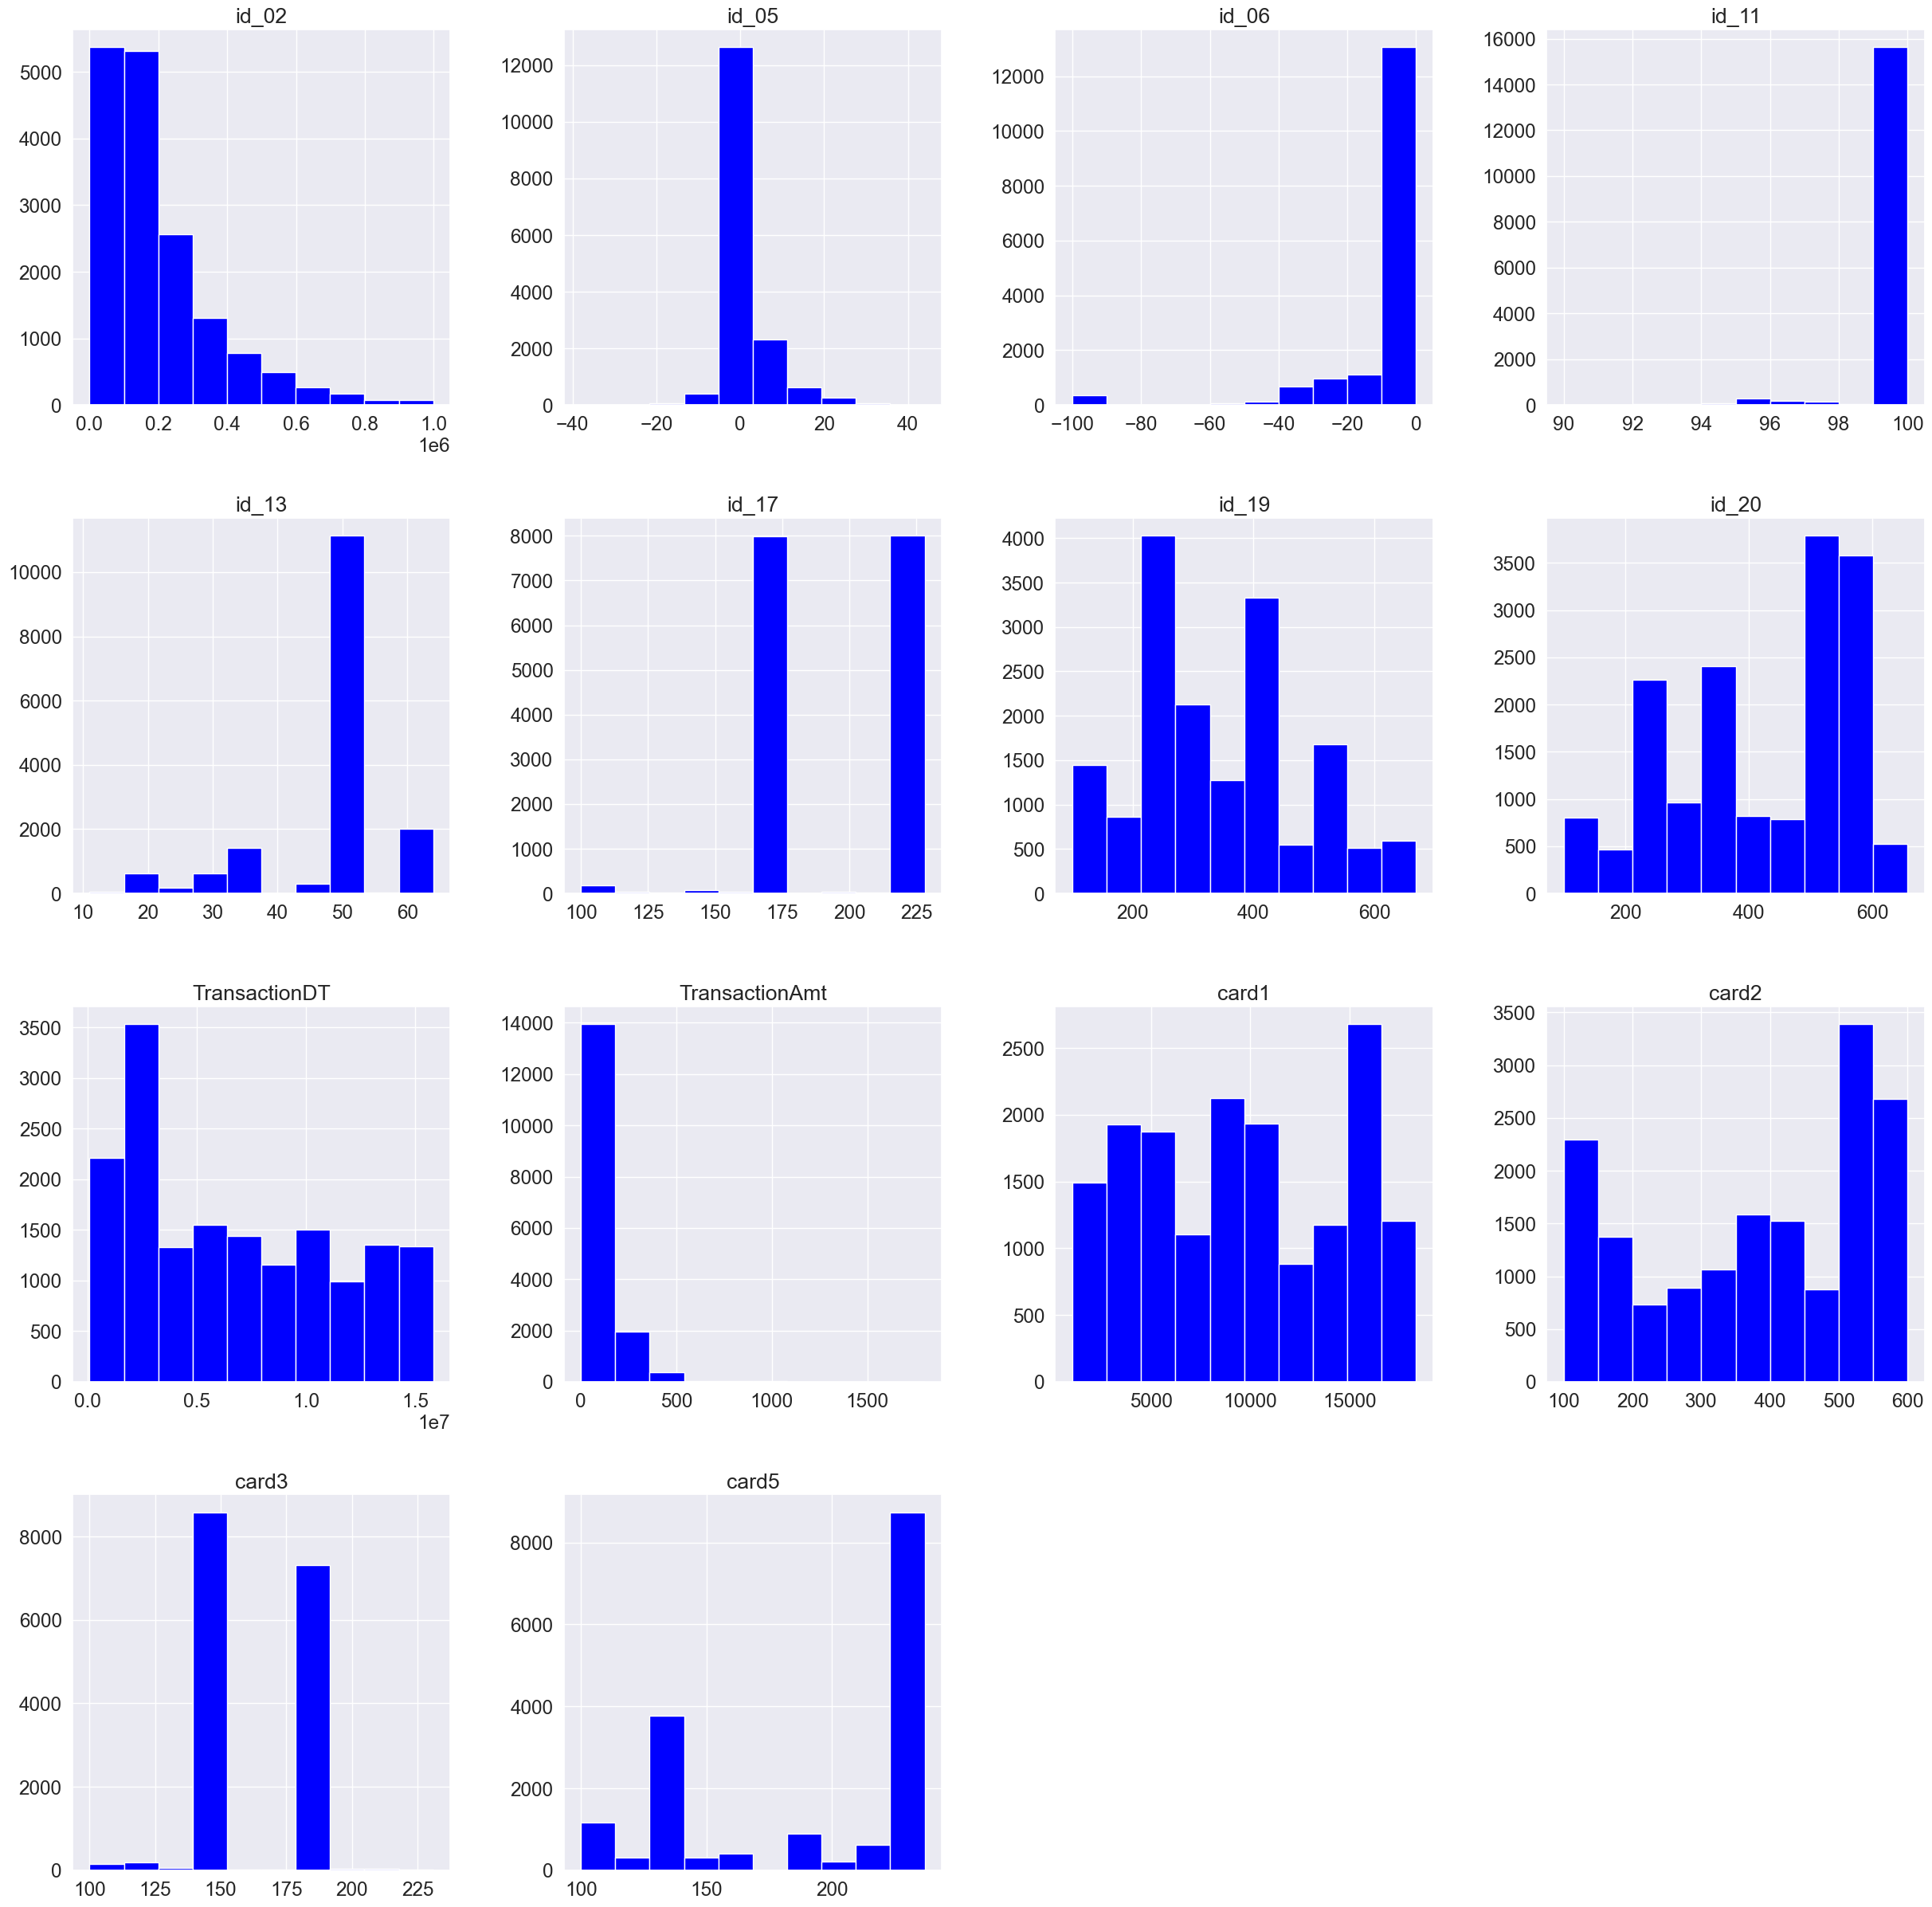

In [34]:
sns.set(font_scale=1.6)
data.iloc[: , 1:15].hist(figsize = (30,30), color = 'blue');

De los histogramas:

Se evidencia simetría en los datos de la variable ‘id_05’.

Por otro lado, vemos que las variables ‘id_02’, ‘id_19’ y ‘TransactionDT’ tiene sesgo a la derecha respectivamente. 

Finalmente, las variables con sesgo significativo hacia la izquierda son ‘id_60’, ‘id_20’ y posiblemente ‘card2’.

Graficar diagrama de caja y bigote para estas variables

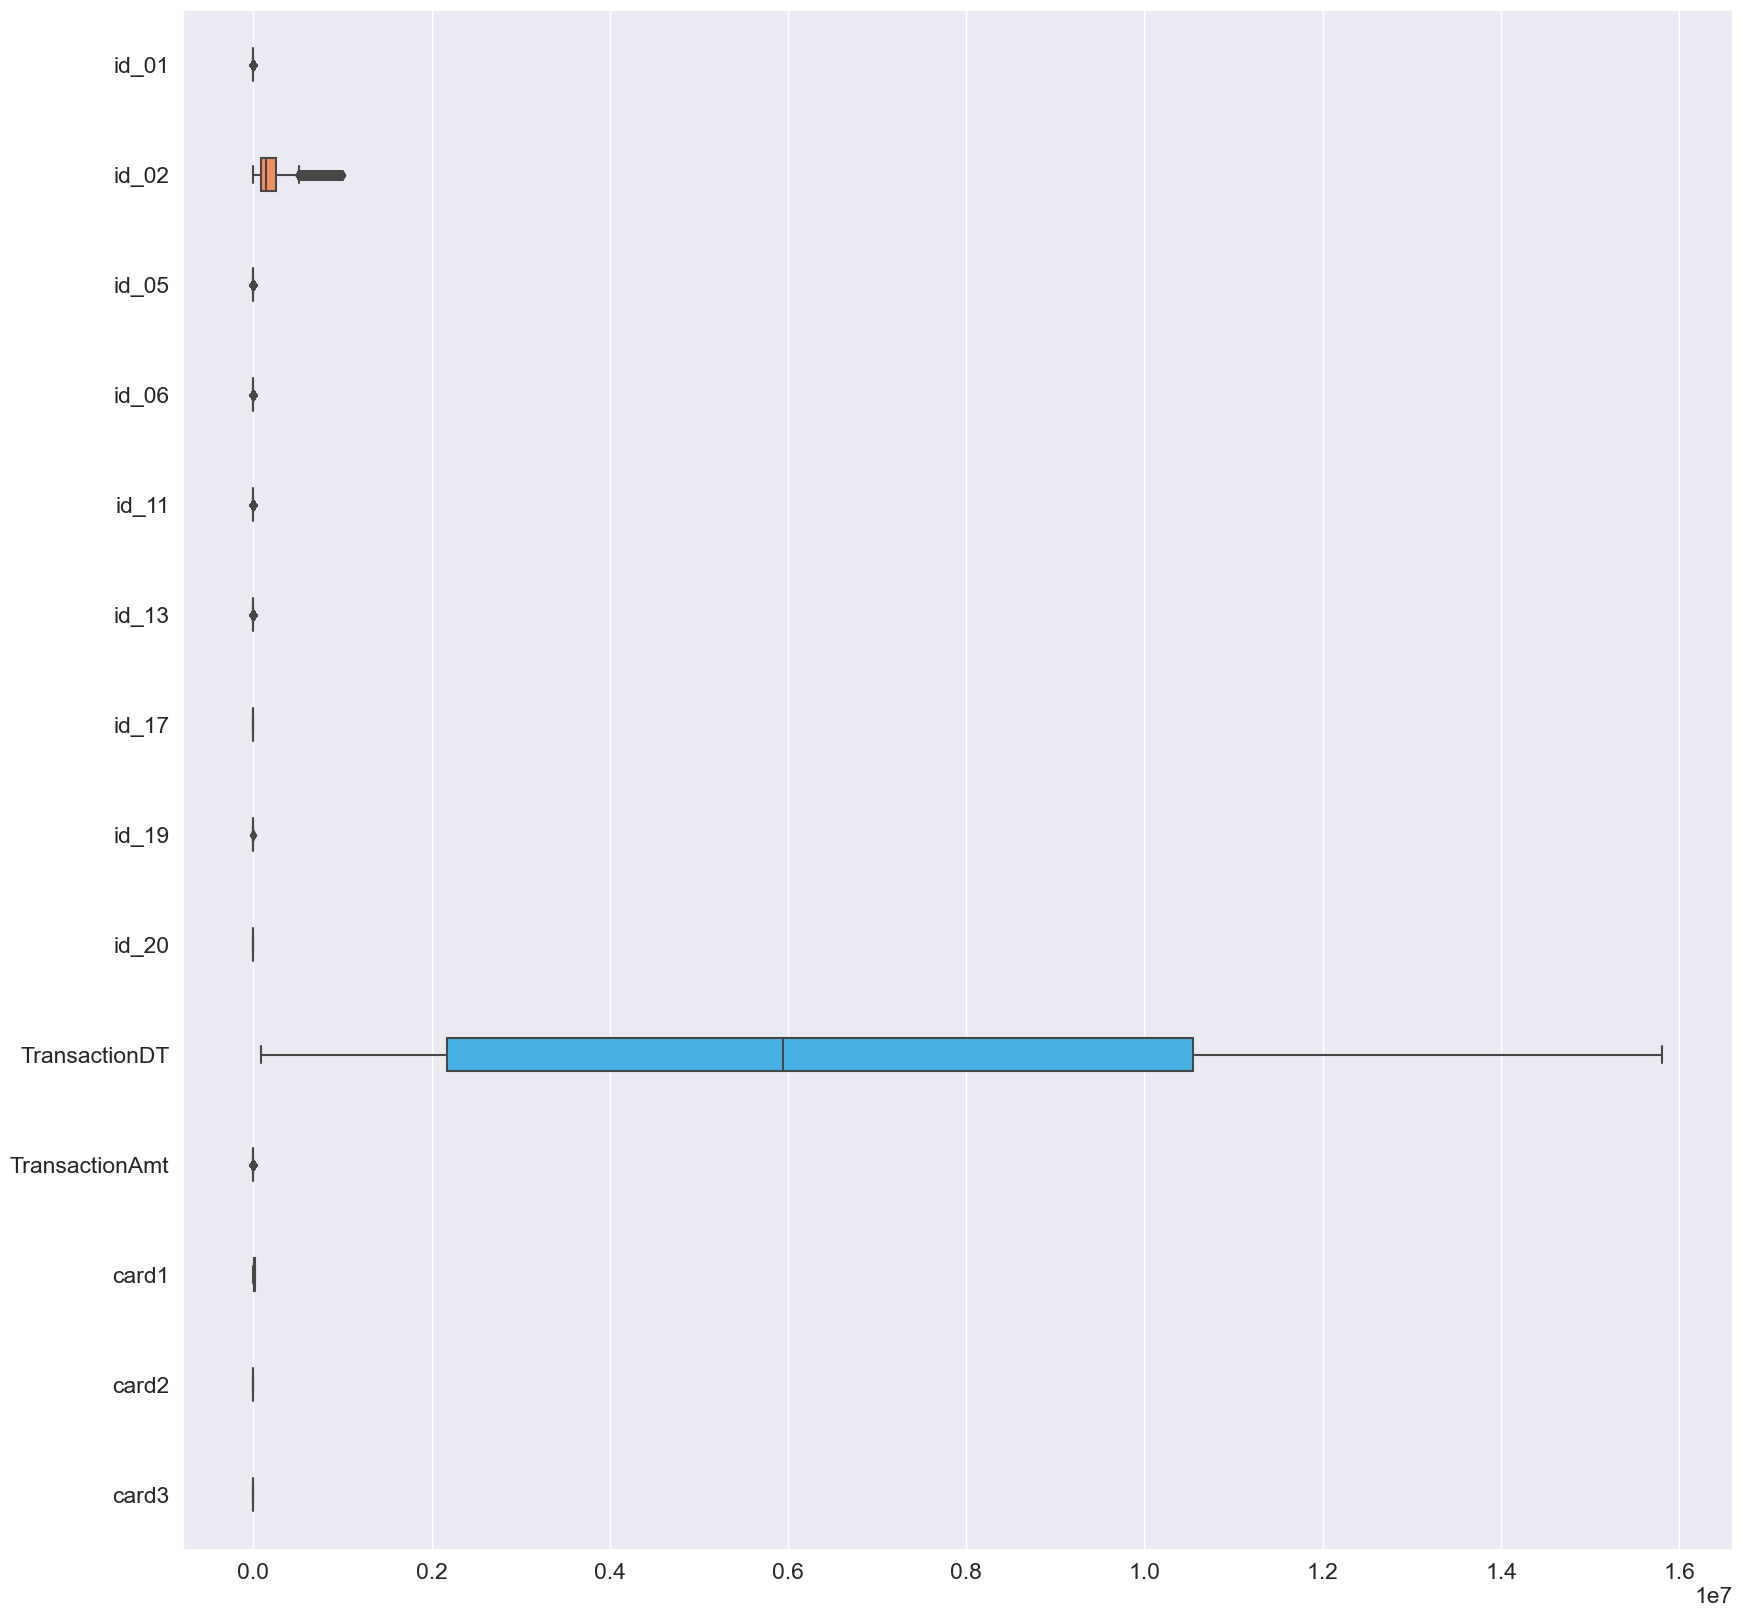

In [35]:
sns.set(font_scale=1.5)
plt.figure(figsize=(20,20))
sns.boxplot(data= dataunion.drop(['isFraud'], axis=1).iloc[:,0:14] ,width=0.3 , saturation=0.9,orient="h");

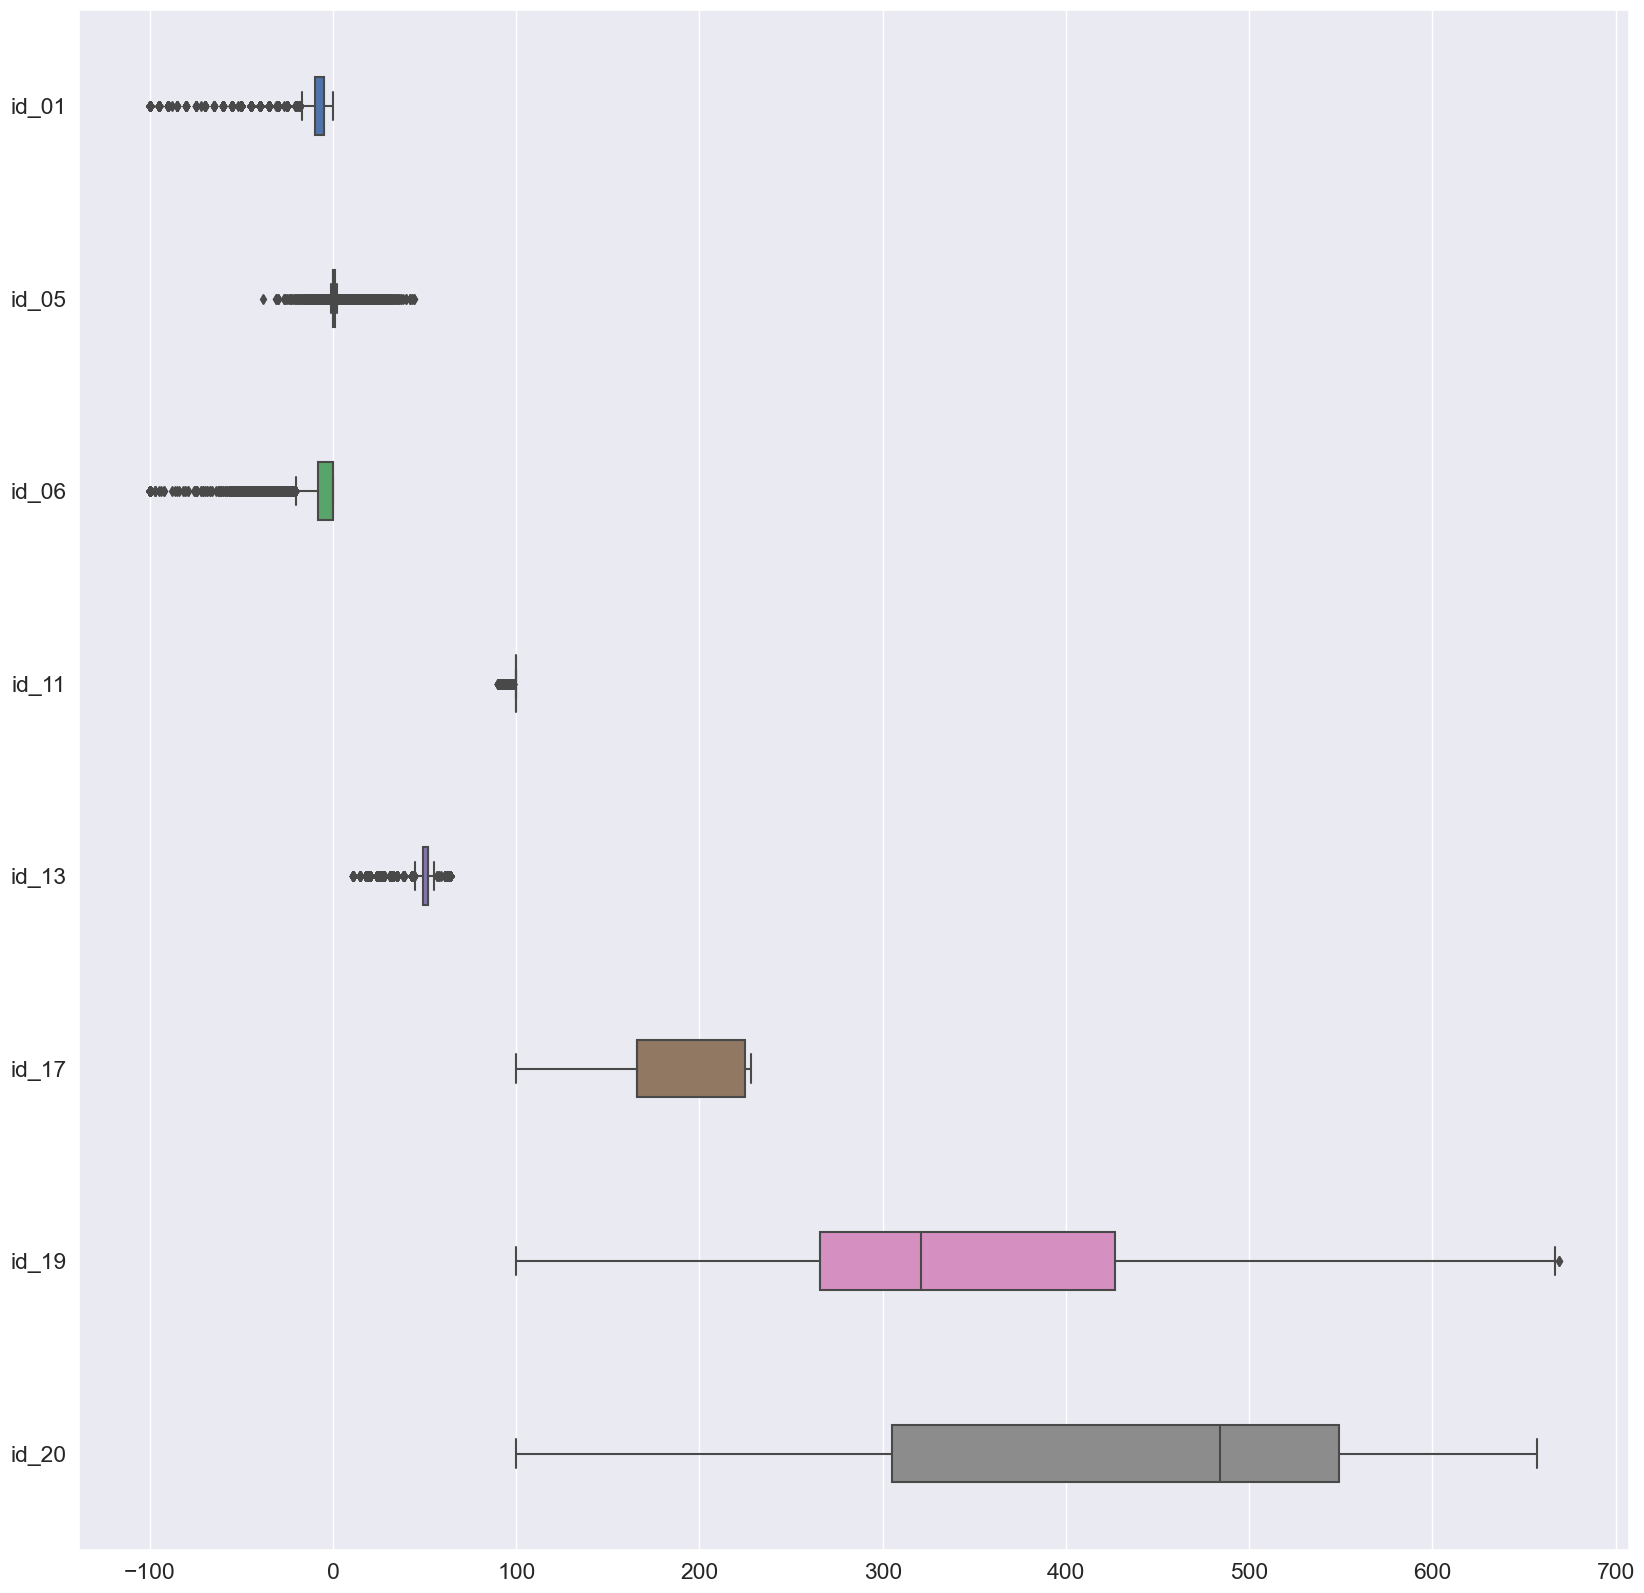

In [36]:
sns.set(font_scale=1.5)
plt.figure(figsize=(20,20))
sns.boxplot(data= dataunion.drop(['isFraud','id_02'], axis=1).iloc[:,0:8] ,width=0.3 , saturation=0.9,orient="h");

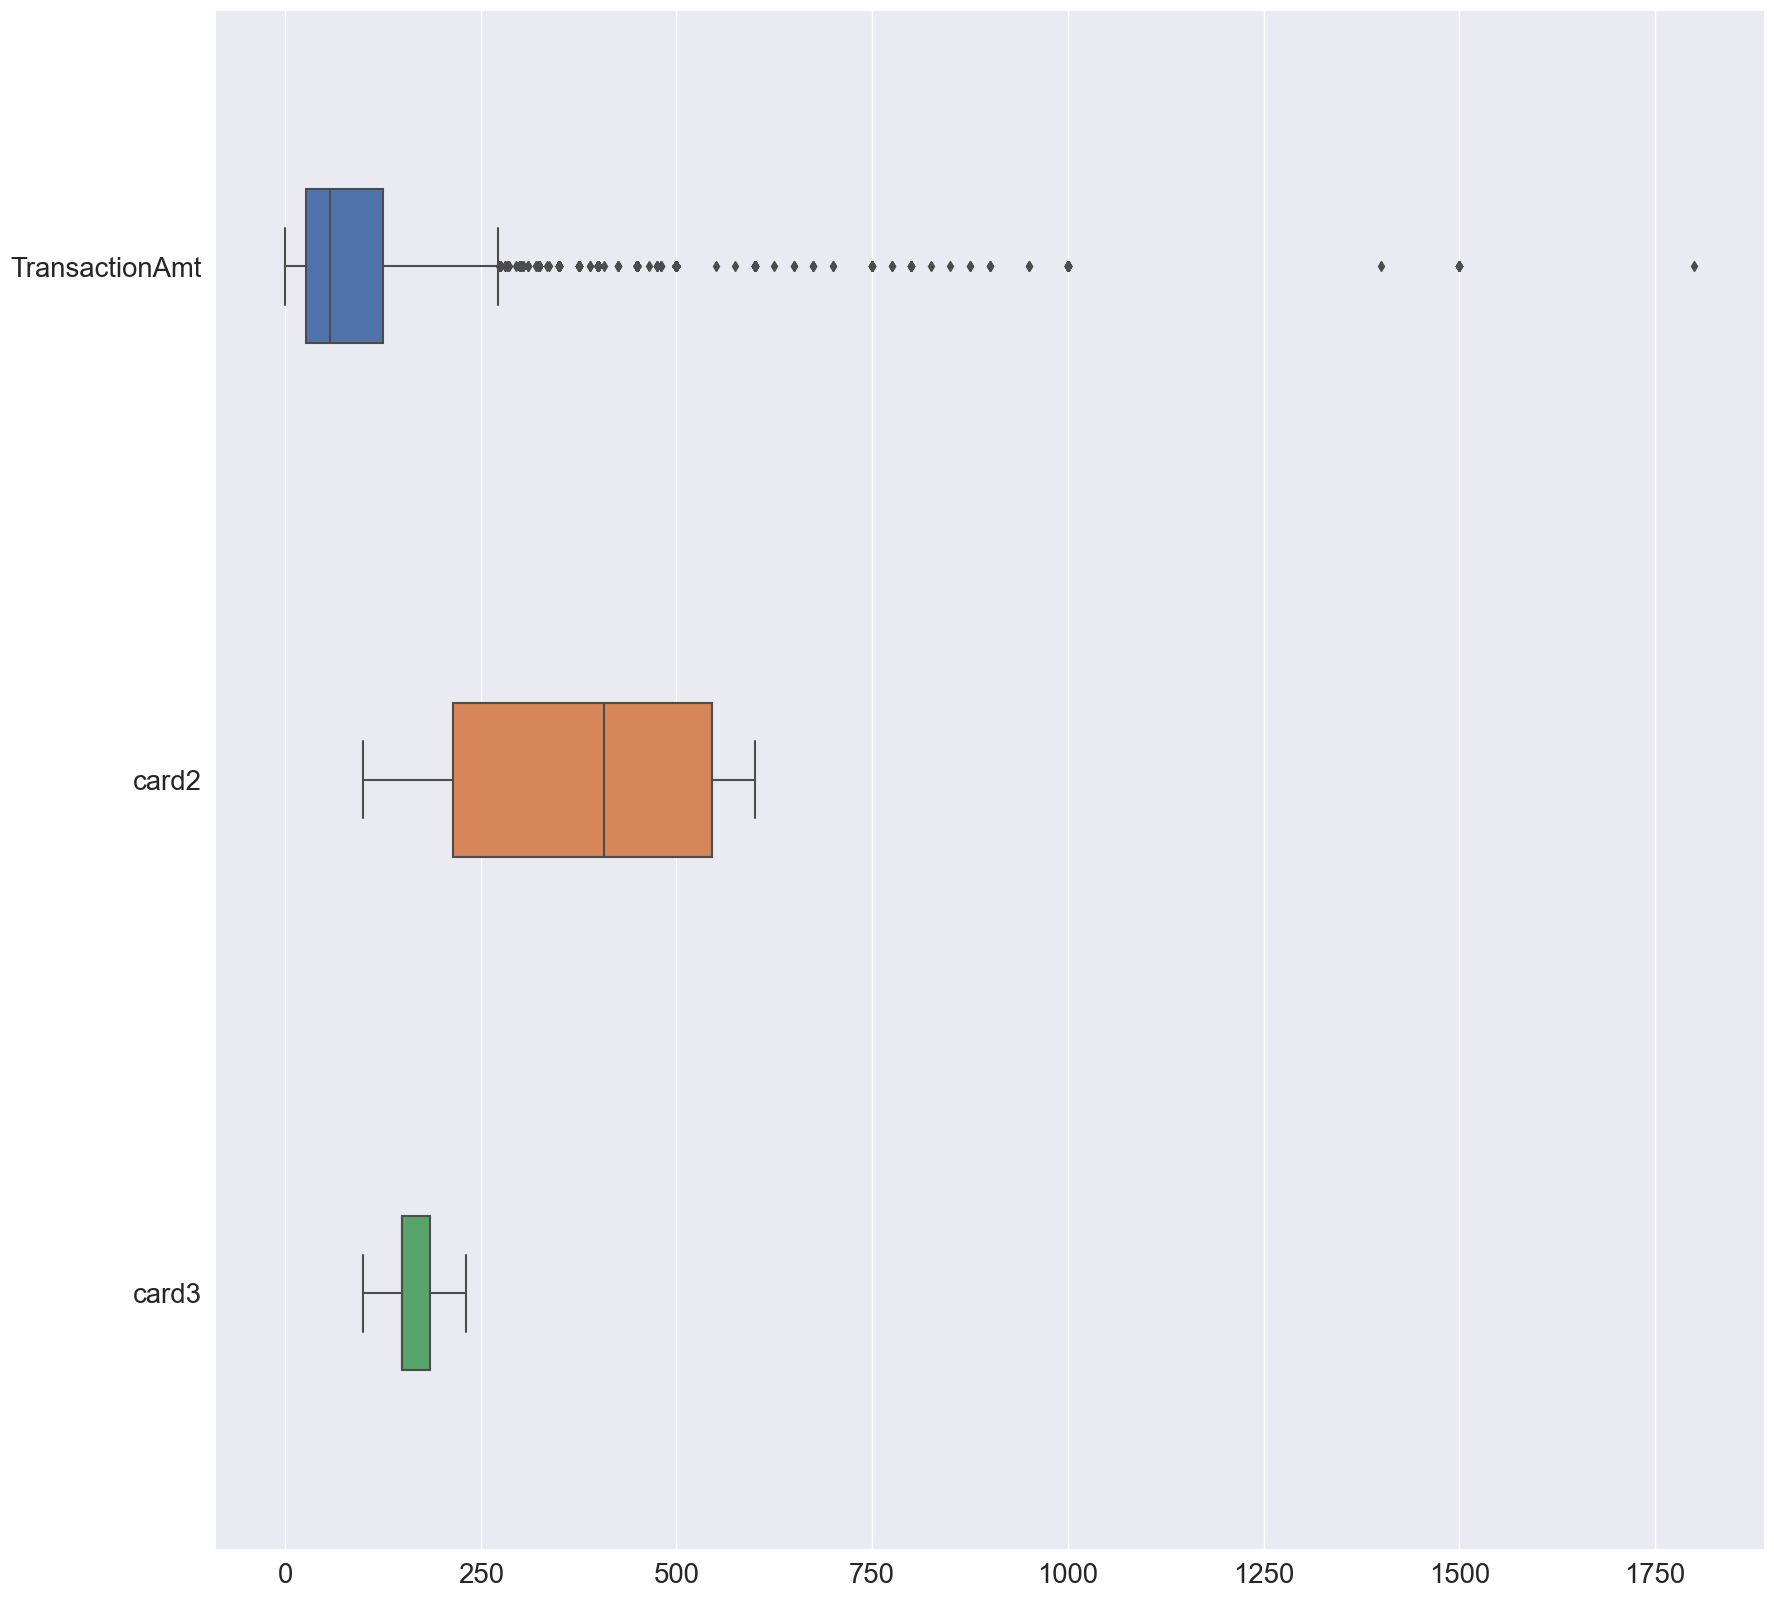

In [37]:
sns.set(font_scale=1.8)
plt.figure(figsize=(20,20))
sns.boxplot(data= dataunion.drop(['isFraud','card1'], axis=1).iloc[:,10:13] ,width=0.3 , saturation=0.9,orient="h");

De los diagramas de caja y bigote: 

Estos nos muestran desproporción en las escalas de los datos, por ejemplo ‘TransactionDT’ tiene valores muy superiores al resto de las variables.

también, se hace evidente que variables como ‘id_01’, ‘id_06’ e ‘id_13’ tienes muchos datos atípicos, adicional las 3 tienen los datos atípicos hacia la cola izquierda de la curva, a diferencia de ‘TransactionATM’ que tiene los datos atípicos hacia la derecha. 


- Análisis bivariado y multivariado

Graficar la relación entre las distintas variables o características con nuestra variable de interés, así como la relación entre las distintas variables. 

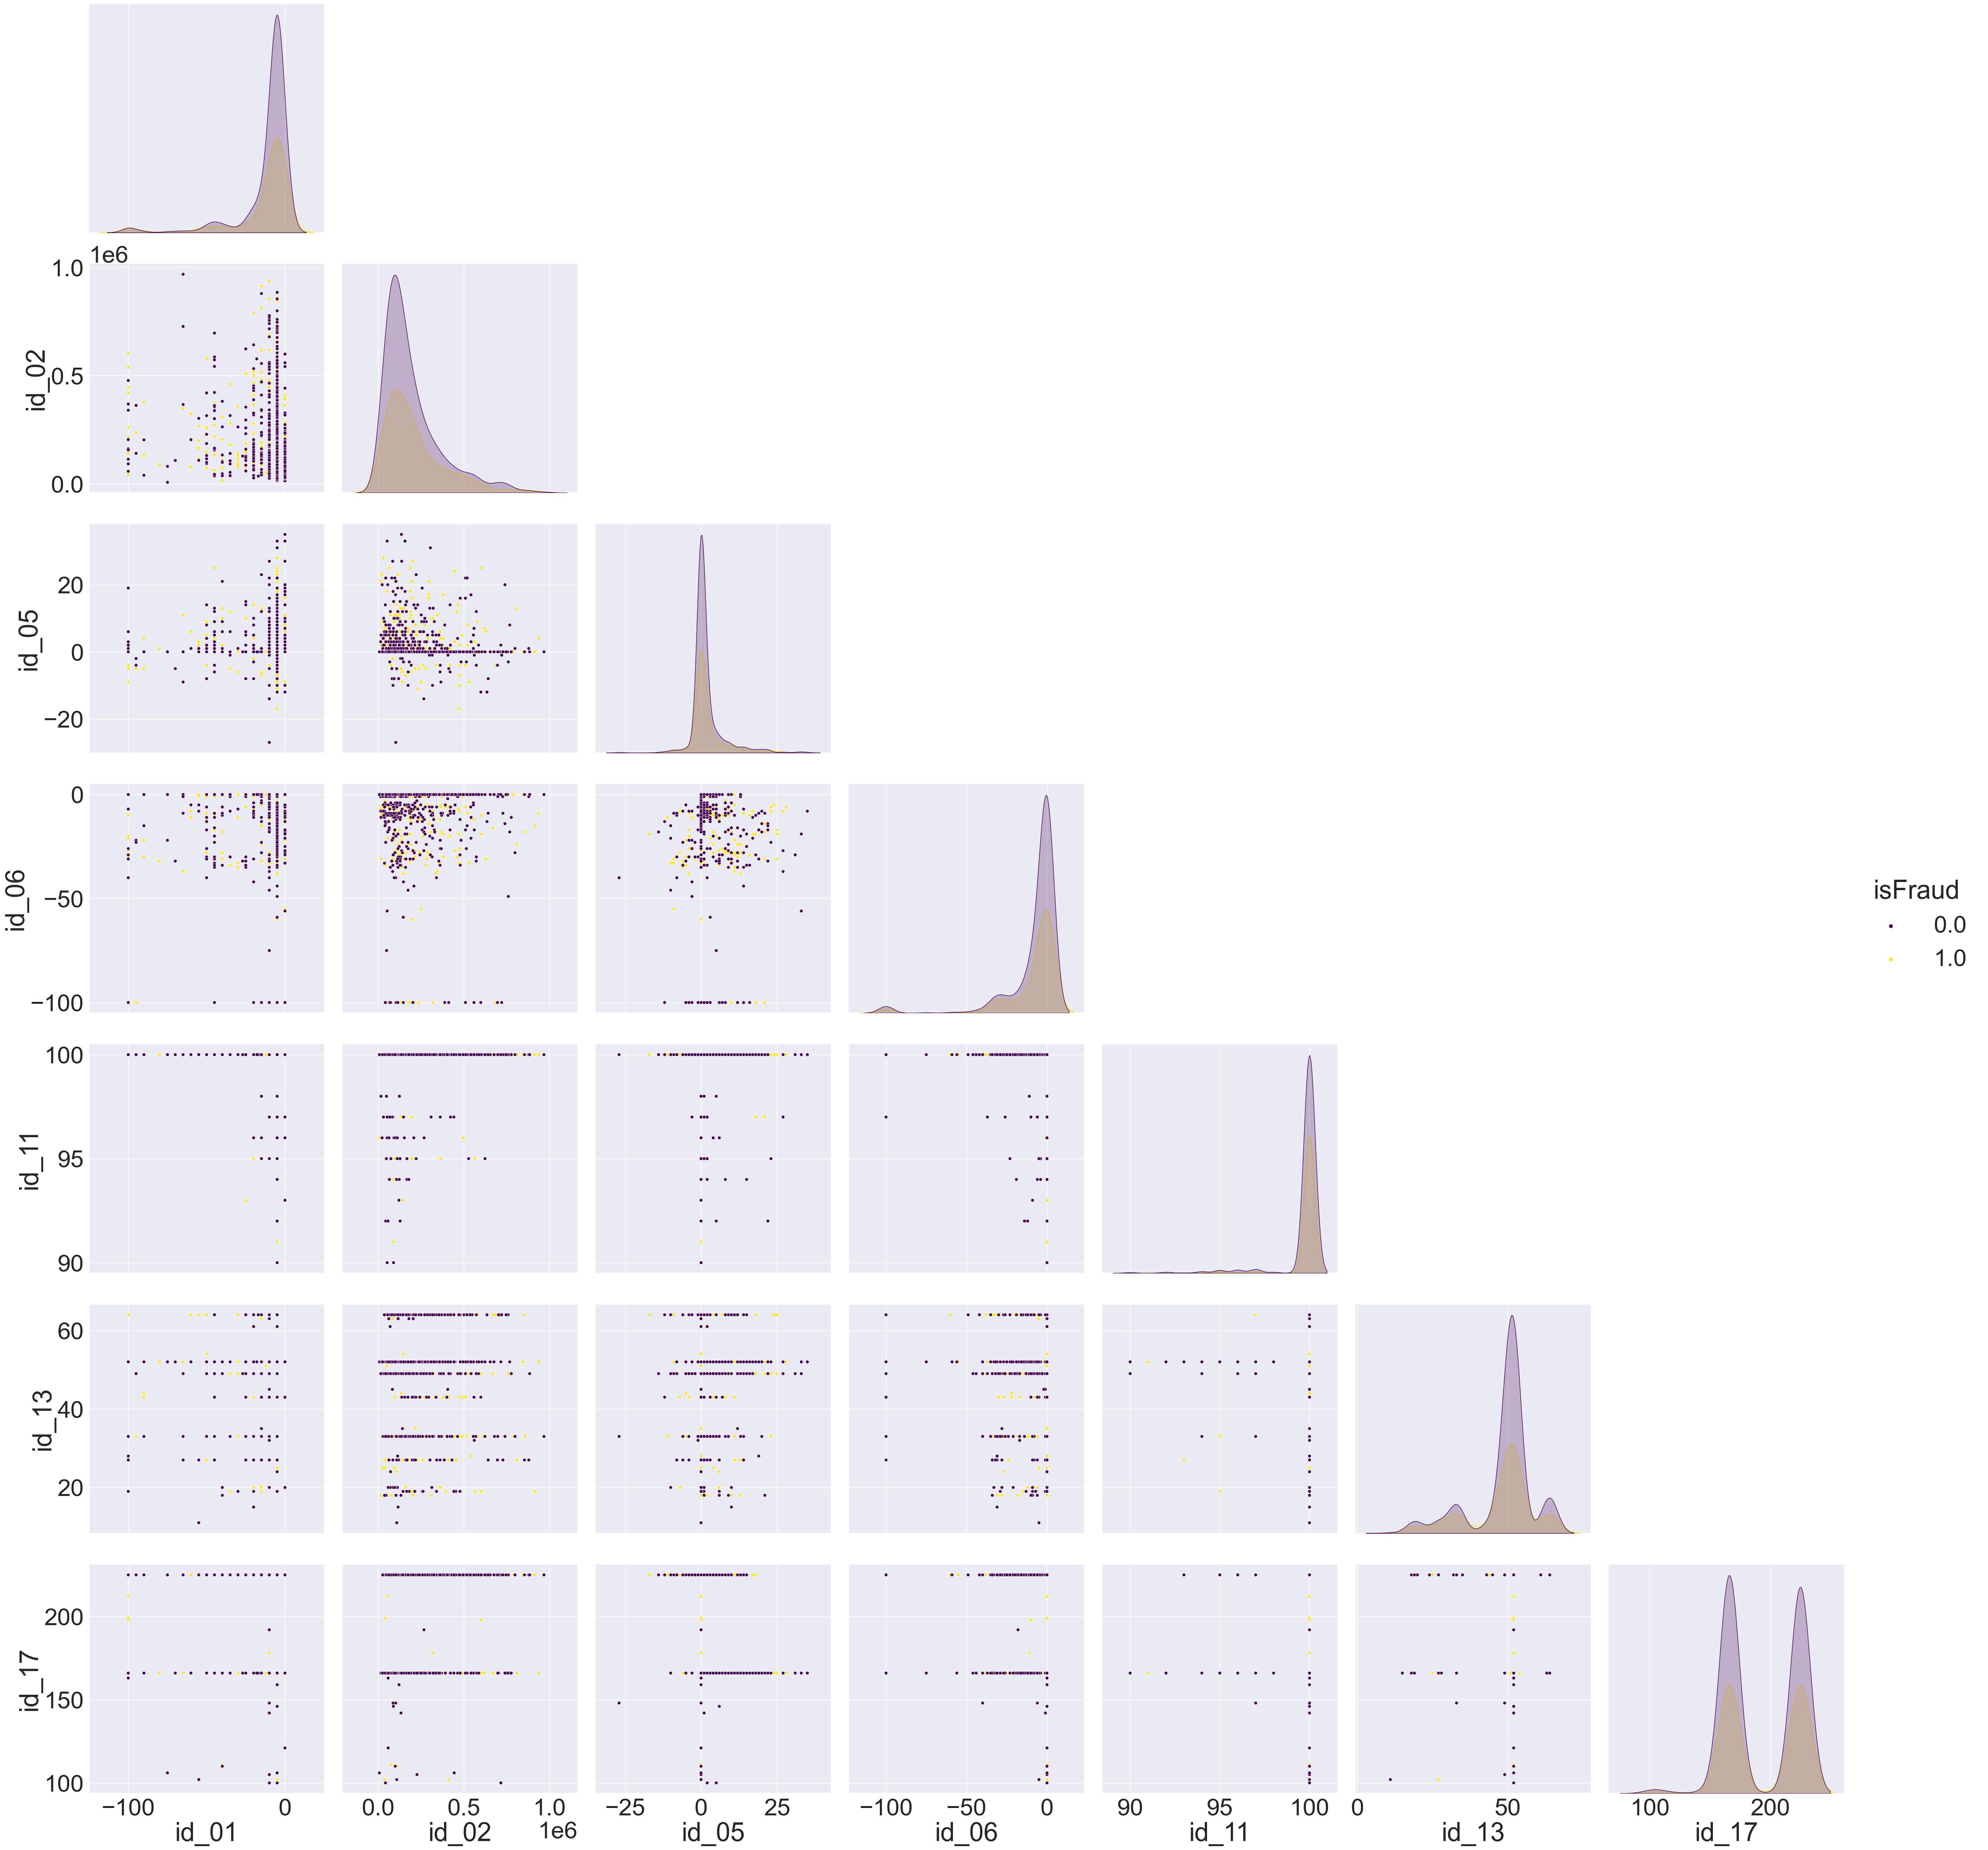

In [38]:
# Aumenta el tamaño de las etiquetas de los ejes
sns.set(font_scale=4.0)

# Tu código para crear el pairplot
sns.pairplot(data=dataunion.iloc[:,0:8], hue="isFraud", palette='viridis', corner=True, height=7.0, 
             aspect=1.0)

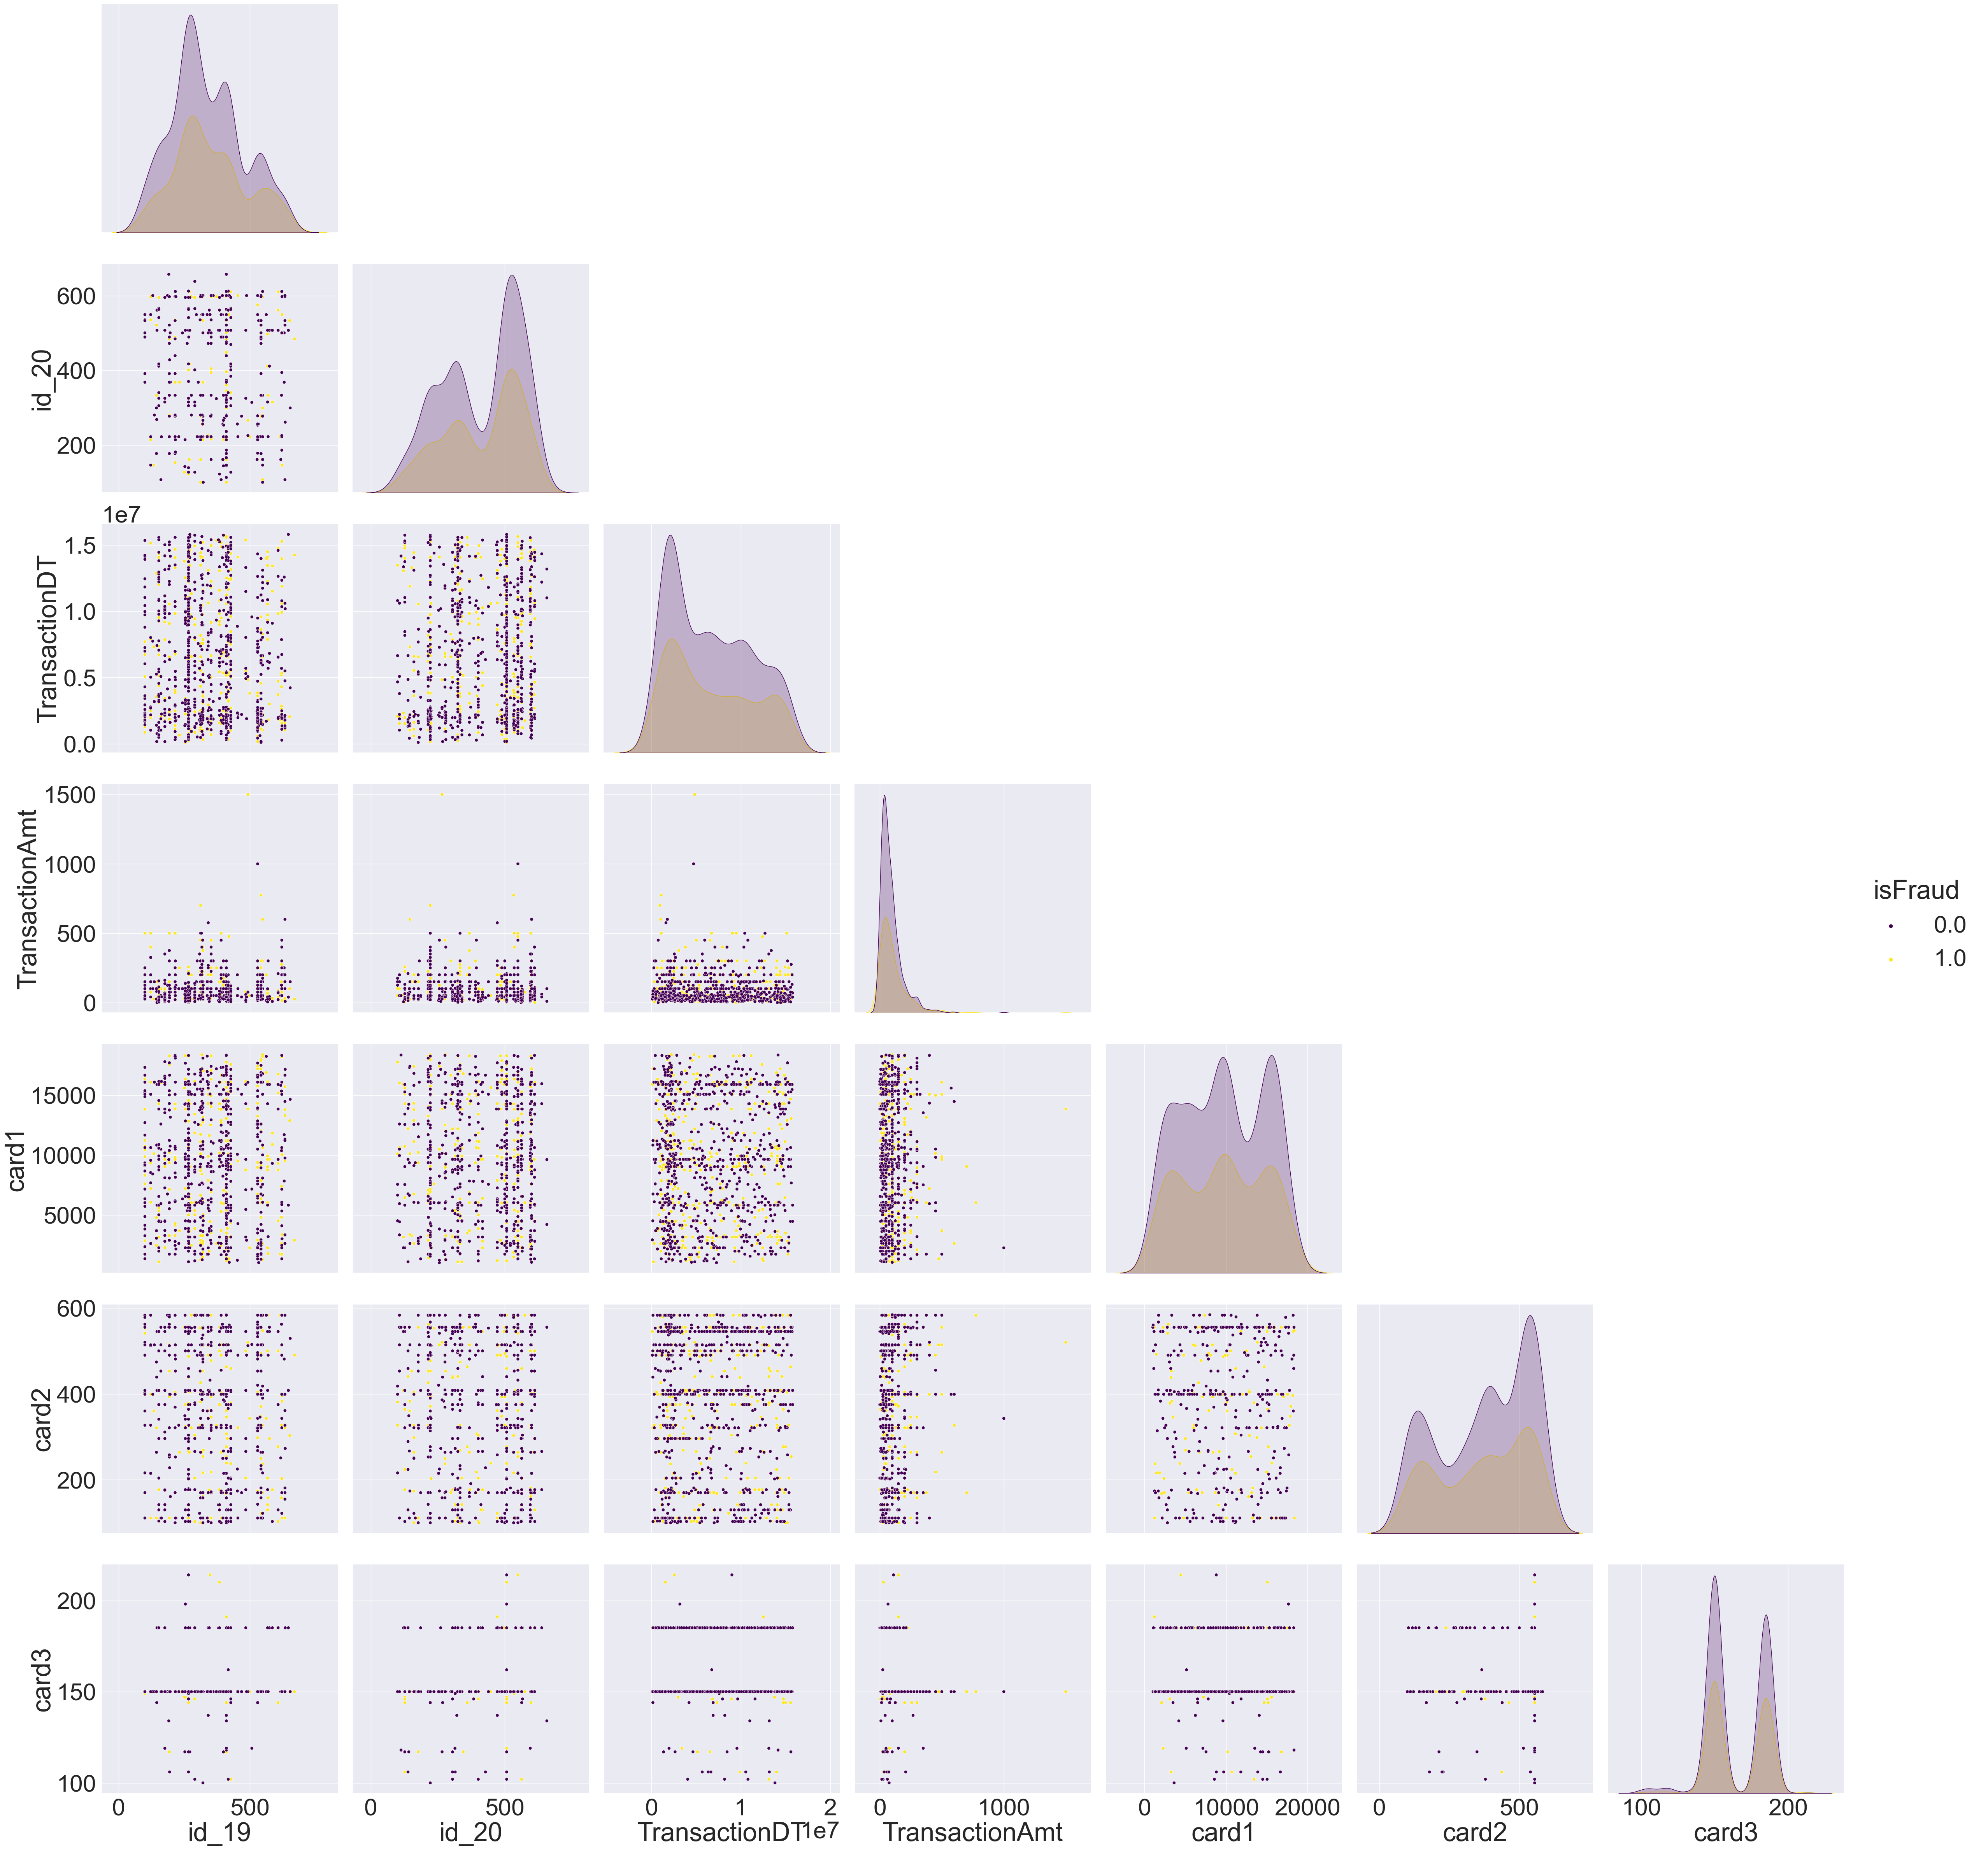

In [39]:
sns.set(font_scale=4.0)
sns.pairplot(data=dataunion.drop(['id_01','id_02','id_05','id_06','id_11','id_13','id_17' ],axis=1).iloc[:,0:8], hue="isFraud", palette='viridis', corner=True, height=7.0, aspect=1.0);

## Modelos de Clasificación

- Librerías

In [40]:
# Librerías para Modelos

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import RidgeClassifier

from sklearn.linear_model import SGDClassifier

from sklearn.naive_bayes import GaussianNB

from xgboost import XGBClassifier

from sklearn.svm import SVC

from sklearn.neural_network import MLPClassifier


- División de los datos

In [41]:
X = data
y = target

In [42]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=68)

In [43]:
def plot_confusion_matrix(y_true, y_pred):

    # Calcular la matriz de confusión
    conf_matrix = confusion_matrix(y_true, y_pred)

    # Crear una figura de matplotlib
    plt.figure(figsize=(6,4))

    # Utilizar seaborn para crear una representación visual de la matriz de confusión
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Negativo', 'Positivo'], yticklabels=['Negativo', 'Positivo'], 
            annot_kws={"fontsize": 10})

    # Configurar etiquetas y título con tamaños de fuente personalizados
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10) 
    plt.xlabel('Predicciones', fontsize=10)
    plt.ylabel('Valores Verdaderos', fontsize=10)
    plt.title('Matriz de Confusión', fontsize=12) 

    # Mostrar la matriz de confusión
    plt.show()

def plot_roc_curve(y_true, y_prob):

    # Calcular la curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Trazar la curva ROC
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])

    # Configurar etiquetas y título con tamaños de fuente personalizados
    plt.xlabel('Tasa de Falsos Positivos (FPR)', fontsize=10)
    plt.ylabel('Tasa de Verdaderos Positivos (TPR)', fontsize=10)
    plt.xlabel('Predicciones', fontsize=10)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(loc="lower right", fontsize=10)

    # Mostrar la curva ROC
    plt.show()

### Modelo K-NN

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Precisión: 0.80
Recall: 0.77
F1-score: 0.78
AUC: 0.80


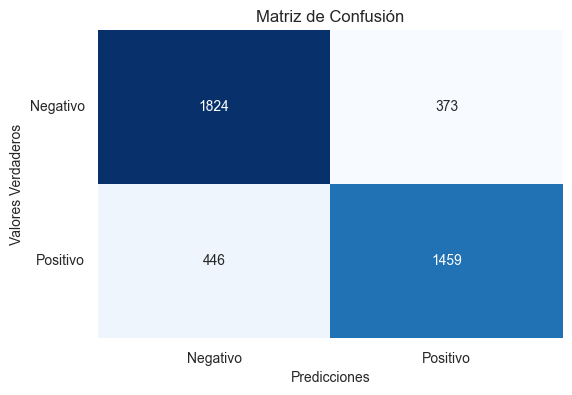

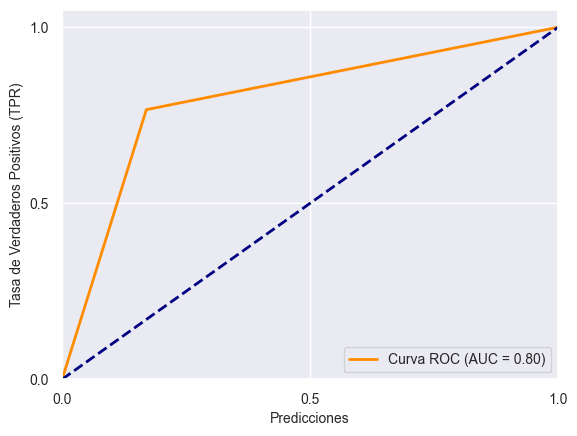

In [44]:
# Crear un pipeline con preprocesamiento, escalado y clasificador KNN
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),  # Escalar las características
    ('knn', KNeighborsClassifier())  # Clasificador KNN
])

# Definir el espacio de hiperparámetros para GridSearch
param_grid = {
    'knn__n_neighbors': [3, 5, 7],  # Número de vecinos cercanos
    'knn__weights': ['uniform', 'distance'],  # Pesos de los vecinos
    'knn__p': [1, 2]  # Parámetro p para la distancia (1: distancia Manhattan, 2: distancia Euclidiana)
}

# Crear un objeto GridSearchCV para buscar la mejor combinación de hiperparámetros
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring=roc_auc_score, verbose=2, n_jobs=-1)

# Ajustar el modelo utilizando GridSearchCV en el conjunto de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo ajustado
best_model = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Calcular las métricas de evaluación en el conjunto de prueba
precision_knn = precision_score(y_test, y_pred)
recall_knn = recall_score(y_test, y_pred)
f1_knn = f1_score(y_test, y_pred)
roc_auc_knn = roc_auc_score(y_test, y_pred)

# Imprimir las métricas
print(f"Precisión: {precision_knn:.2f}")
print(f"Recall: {recall_knn:.2f}")
print(f"F1-score: {f1_knn:.2f}")
print(f"AUC: {roc_auc_knn:.2f}")

plot_confusion_matrix(y_true=y_test,y_pred=y_pred)

plot_roc_curve(y_true=y_test,y_prob=y_pred)

### Modelo Ridge

Fitting 5 folds for each of 42 candidates, totalling 210 fits
Precisión: 0.80
Recall: 0.71
F1-score: 0.75
AUC: 0.78


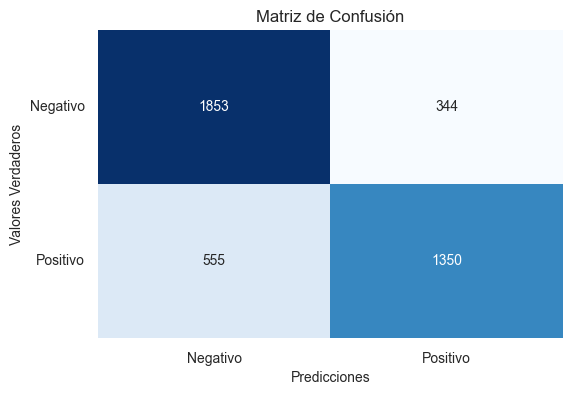

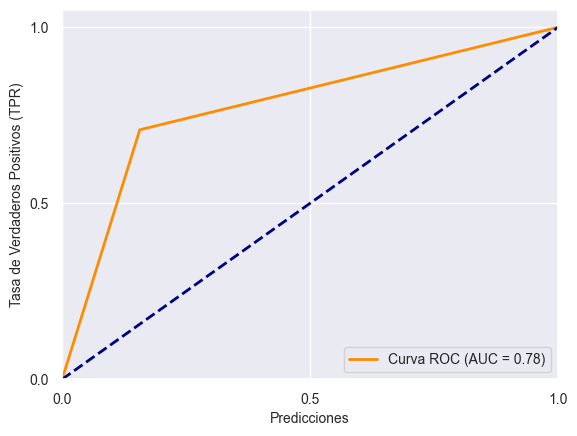

In [45]:
# Crear un pipeline con preprocesamiento, escalado y el clasificador Ridge
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),  # Escalar las características
    ('ridge', RidgeClassifier())  # Clasificador Ridge
])

# Definir el espacio de hiperparámetros para GridSearch
param_grid = {
    'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100],  # Parámetro de regularización alpha
    'ridge__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']  # Solucionador de Ridge
}

# Crear un objeto GridSearchCV para buscar la mejor combinación de hiperparámetros
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring=roc_auc_score, verbose=2, n_jobs=-1)

# Ajustar el modelo utilizando GridSearchCV en el conjunto de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo ajustado
best_model = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Calcular las métricas de evaluación en el conjunto de prueba
precision_ridge = precision_score(y_test, y_pred)
recall_ridge = recall_score(y_test, y_pred)
f1_ridge = f1_score(y_test, y_pred)
roc_auc_ridge = roc_auc_score(y_test, y_pred)

# Imprimir las métricas
print(f"Precisión: {precision_ridge:.2f}")
print(f"Recall: {recall_ridge:.2f}")
print(f"F1-score: {f1_ridge:.2f}")
print(f"AUC: {roc_auc_ridge:.2f}")

plot_confusion_matrix(y_true=y_test,y_pred=y_pred)

plot_roc_curve(y_true=y_test,y_prob=y_pred)

### Modelo Lasso

Fitting 5 folds for each of 36 candidates, totalling 180 fits


Precisión: 0.46
Recall: 0.56
F1-score: 0.51
AUC: 0.50


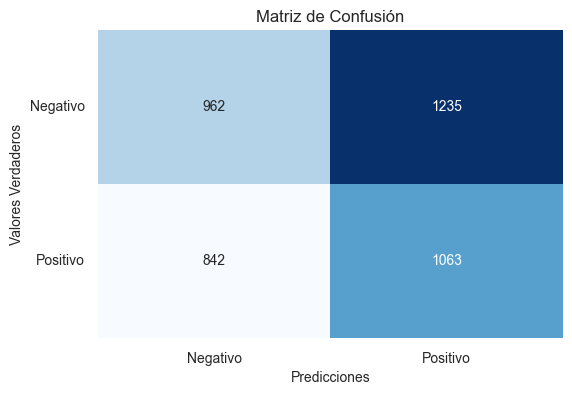

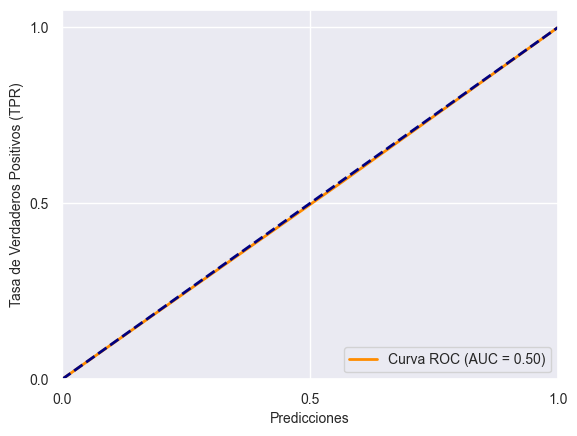

In [46]:
# Crear un pipeline con preprocesamiento, escalado y clasificador lineal con penalidad L1
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),  # Escalar las características
    ('lasso', SGDClassifier(loss='squared_error', penalty='l1'))  # Clasificador lineal con penalidad L1 (Lasso)
])

param_grid = {
    'lasso__alpha': [0.001, 0.01, 0.1, 1, 10, 100],  # Parámetro de regularización alpha
    'lasso__max_iter': [100, 200, 500],  # Número máximo de iteraciones
    'lasso__fit_intercept': [True, False],  # Ajustar intercepción o no
}

# Crear un objeto GridSearchCV para buscar la mejor combinación de hiperparámetros
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring=roc_auc_score, verbose=2, n_jobs=-1)

# Ajustar el modelo utilizando GridSearchCV en el conjunto de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo ajustado
best_model = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Calcular las métricas de evaluación en el conjunto de prueba
precision_lasso = precision_score(y_test, y_pred)
recall_lasso = recall_score(y_test, y_pred)
f1_lasso = f1_score(y_test, y_pred)
roc_auc_lasso = roc_auc_score(y_test, y_pred)

# Imprimir las métricas
print(f"Precisión: {precision_lasso:.2f}")
print(f"Recall: {recall_lasso:.2f}")
print(f"F1-score: {f1_lasso:.2f}")
print(f"AUC: {roc_auc_lasso:.2f}")

plot_confusion_matrix(y_true=y_test,y_pred=y_pred)

plot_roc_curve(y_true=y_test,y_prob=y_pred)

### Modelo Naive Bayes

Precisión: 0.47
Recall: 0.97
F1-score: 0.63
AUC: 0.50


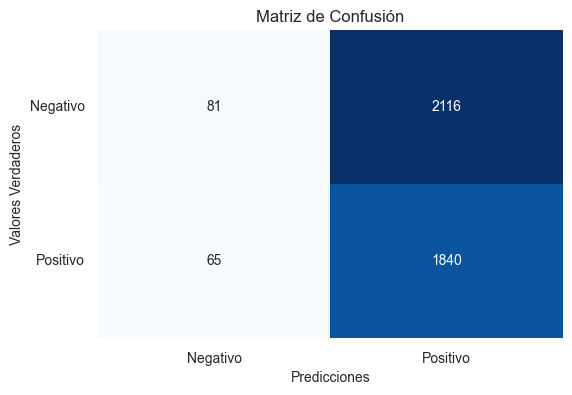

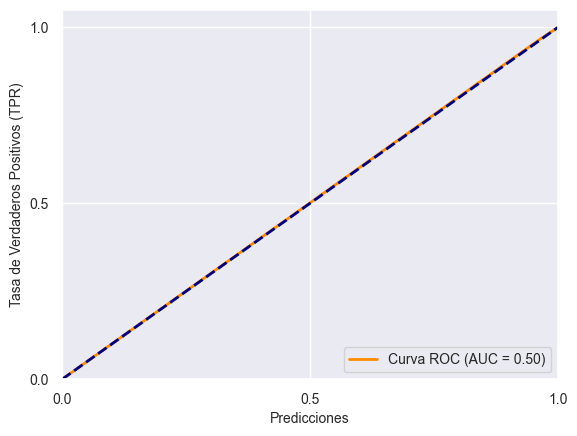

In [47]:
# Crear un pipeline con preprocesamiento y clasificador Naive Bayes Gaussiano
pipeline = Pipeline([
    ('naive_bayes', GaussianNB())  # Clasificador Naive Bayes Gaussiano
])

# Ajustar el modelo en el conjunto de entrenamiento
pipeline.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Calcular las métricas de evaluación en el conjunto de prueba
precision_NB = precision_score(y_test, y_pred)
recall_NB = recall_score(y_test, y_pred)
f1_NB = f1_score(y_test, y_pred)
roc_auc_NB = roc_auc_score(y_test, y_pred)

# Imprimir las métricas
print(f"Precisión: {precision_NB:.2f}")
print(f"Recall: {recall_NB:.2f}")
print(f"F1-score: {f1_NB:.2f}")
print(f"AUC: {roc_auc_NB:.2f}")

plot_confusion_matrix(y_true=y_test,y_pred=y_pred)

plot_roc_curve(y_true=y_test,y_prob=y_pred)

### Modelo XGBoots

Fitting 5 folds for each of 81 candidates, totalling 405 fits


Precisión: 0.86
Recall: 0.62
F1-score: 0.72
AUC: 0.86


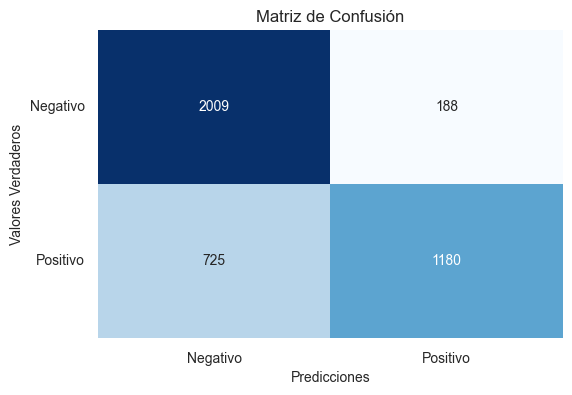

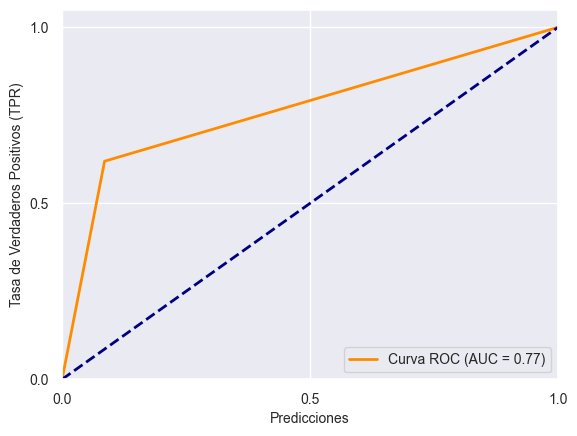

In [48]:
# Crear un pipeline con preprocesamiento, sin escalar (los arboles de decisión no lo requieren) y clasificador XGBoost
pipeline = Pipeline([
    ('xgboost', XGBClassifier())  # Clasificador XGBoost
])

# Definir el espacio de hiperparámetros para GridSearch
param_grid = {
    'xgboost__n_estimators': [100, 200, 300],  # Número de árboles
    'xgboost__learning_rate': [0.01, 0.1, 0.2],  # Tasa de aprendizaje
    'xgboost__max_depth': [3, 4, 5],  # Profundidad máxima del árbol
    'xgboost__min_child_weight': [1, 2, 3]  # Peso mínimo de un hijo
}

# Crear un objeto GridSearchCV para buscar la mejor combinación de hiperparámetros
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring=roc_auc_score, verbose=2, n_jobs=-1)

# Ajustar el modelo utilizando GridSearchCV en el conjunto de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo ajustado
best_model = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Calcular las métricas de evaluación en el conjunto de prueba
precision_XG = precision_score(y_test, y_pred)
recall_XG = recall_score(y_test, y_pred)
f1_XG = f1_score(y_test, y_pred)
roc_auc_XG = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])  # Utilizando probabilidad de clase positiva

# Imprimir las métricas
print(f"Precisión: {precision_XG:.2f}")
print(f"Recall: {recall_XG:.2f}")
print(f"F1-score: {f1_XG:.2f}")
print(f"AUC: {roc_auc_XG:.2f}")


plot_confusion_matrix(y_true=y_test,y_pred=y_pred)

plot_roc_curve(y_true=y_test,y_prob=y_pred)

### Modelo SVM 

Fitting 5 folds for each of 12 candidates, totalling 60 fits


Precisión: 0.81
Recall: 0.70
F1-score: 0.75
AUC: 0.85


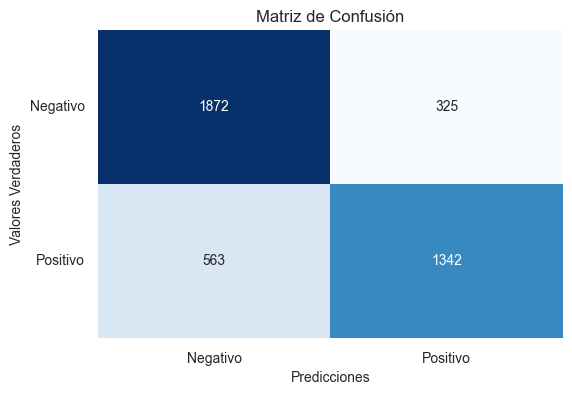

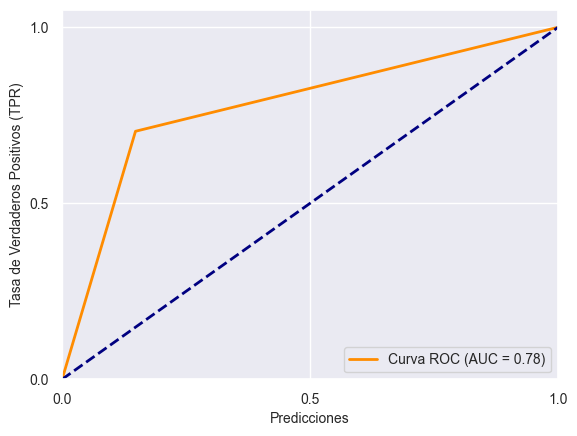

In [49]:
# Crear un pipeline con preprocesamiento, escalado y clasificador SVM lineal
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),  # Escalar las características
    ('svm', SVC(kernel='linear', probability=True))  # Clasificador SVM lineal
])

# Definir el espacio de hiperparámetros para GridSearch
param_grid = {
    'svm__C': [0.1, 1, 10],  # Parámetro de regularización C
    'svm__kernel': ['linear', 'rbf'],  # Tipo de kernel
    'svm__gamma': ['scale', 'auto'],  # Parámetro gamma para kernel RBF
}

# Crear un objeto GridSearchCV para buscar la mejor combinación de hiperparámetros
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring=roc_auc_score, verbose=2, n_jobs=-1)

# Ajustar el modelo utilizando GridSearchCV en el conjunto de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo ajustado
best_model = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Calcular las métricas de evaluación en el conjunto de prueba
precision_SVM = precision_score(y_test, y_pred)
recall_SVM = recall_score(y_test, y_pred)
f1_SVM = f1_score(y_test, y_pred)
roc_auc_SVM = roc_auc_score(y_test, best_model.decision_function(X_test))  # Utilizando funcion de desición

# Imprimir las métricas
print(f"Precisión: {precision_SVM:.2f}")
print(f"Recall: {recall_SVM:.2f}")
print(f"F1-score: {f1_SVM:.2f}")
print(f"AUC: {roc_auc_SVM:.2f}")

plot_confusion_matrix(y_true=y_test,y_pred=y_pred)

plot_roc_curve(y_true=y_test,y_prob=y_pred)

### Modelo MPL

Fitting 5 folds for each of 36 candidates, totalling 180 fits


Precisión: 0.88
Recall: 0.79
F1-score: 0.84
AUC: 0.93


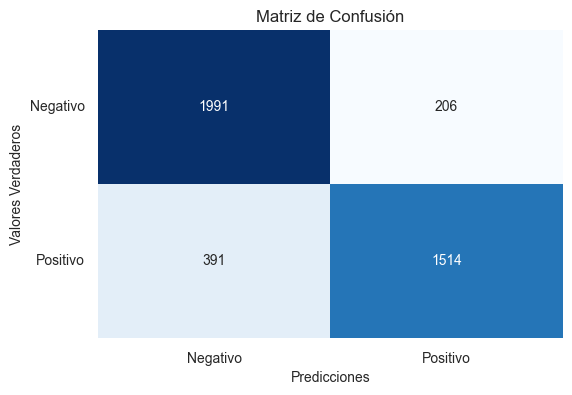

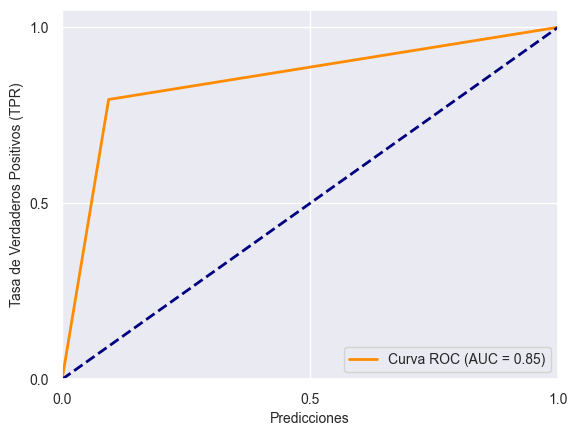

In [50]:
# Crear un pipeline con preprocesamiento, escalado y clasificador MLP
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),  # Escalar las características
    ('mlp', MLPClassifier(random_state=68))  # Clasificador MLP
])

# Definir el espacio de hiperparámetros para GridSearch
param_grid = {
    'mlp__hidden_layer_sizes': [(50,), (100,), (50, 50)],  # Tamaño de las capas ocultas
    'mlp__activation': ['relu', 'logistic'],  # Función de activación
    'mlp__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],  # Parámetro de regularización alpha
}

# Crear un objeto GridSearchCV para buscar la mejor combinación de hiperparámetros
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring=roc_auc_score, verbose=2, n_jobs=-1)

# Ajustar el modelo utilizando GridSearchCV en el conjunto de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo ajustado
best_model = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Calcular las métricas de evaluación en el conjunto de prueba
precision_MPL = precision_score(y_test, y_pred)
recall_MPL = recall_score(y_test, y_pred)
f1_MPL = f1_score(y_test, y_pred)
roc_auc_MPL = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1]) # Utilizando la probabilidad de clase positiva

# Imprimir las métricas
print(f"Precisión: {precision_MPL:.2f}")
print(f"Recall: {recall_MPL:.2f}")
print(f"F1-score: {f1_MPL:.2f}")
print(f"AUC: {roc_auc_MPL:.2f}")

plot_confusion_matrix(y_true=y_test,y_pred=y_pred)

plot_roc_curve(y_true=y_test,y_prob=y_pred)

## Resultados de los Modelos

In [51]:
# Nombres de los modelos
nombres_modelos = ['K-NN', 'Ridge', 'Lasso', 'Naive Bayes', 'XGBoost', 'SVM', 'MLP']

# Definir las listas de métricas para cada modelo
precission_scores = [precision_knn, precision_ridge, precision_lasso, precision_NB, precision_XG, precision_SVM, precision_MPL]
recall_scores = [recall_knn, recall_ridge, recall_lasso, recall_NB, recall_XG, recall_SVM, recall_MPL]
f1_scores = [f1_knn, f1_ridge, f1_lasso, f1_NB, f1_XG, f1_SVM, f1_MPL]
AUC_scores = [roc_auc_knn, roc_auc_ridge, roc_auc_lasso, roc_auc_NB, roc_auc_XG, roc_auc_SVM, roc_auc_MPL]

# Crear un DataFrame para almacenar las métricas
df_resultados = pd.DataFrame({
    'Modelo': nombres_modelos,
    'precission': precission_scores,
    'recall': recall_scores,
    'f1-score': f1_scores,
    'AUC': AUC_scores
})

print(df_resultados)

        Modelo  precission    recall  f1-score       AUC
0         K-NN    0.796397  0.765879  0.780840  0.798051
1        Ridge    0.796930  0.708661  0.750208  0.776042
2        Lasso    0.462576  0.558005  0.505829  0.497938
3  Naive Bayes    0.465116  0.965879  0.627879  0.501374
4      XGBoost    0.862573  0.619423  0.721051  0.856403
5          SVM    0.805039  0.704462  0.751400  0.853157
6          MLP    0.880233  0.794751  0.835310  0.925171


### Mejor modelo basado en la metrica AUC

In [52]:
# Encontrar el índice del modelo con el AUC más alto
indice_mejor_auc = AUC_scores.index(max(AUC_scores))

# Obtiener el nombre del modelo con el AUC más alto
mejor_modelo = nombres_modelos[indice_mejor_auc]

# Mostrar el modelo con el RMSE más bajo y su valor de RMSE
print(f"El modelo con el AUC más alto es {mejor_modelo} con un AUC = {max(AUC_scores)}")

El modelo con el AUC más alto es MLP con un AUC = 0.9251711651655741


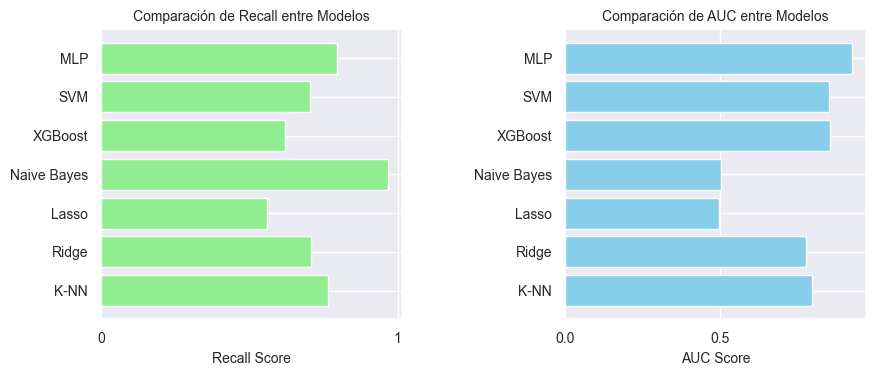

In [62]:
plt.figure(figsize=(10, 5))


# Gráfica de Recall
plt.subplot(1, 2, 1)
plt.barh(nombres_modelos, recall_scores, color='lightgreen')
plt.xlabel('Recall Score', fontsize=10)
plt.title('Comparación de Recall entre Modelos', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Gráfica de AUC
plt.subplot(1, 2, 2)
plt.barh(nombres_modelos, AUC_scores, color='skyblue')
plt.xlabel('AUC Score', fontsize=10)
plt.title('Comparación de AUC entre Modelos', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


plt.tight_layout()
plt.show()

## Conclusiones


En el contexto de desarrollar un modelo predictivo para detectar fraudes en transacciones bancarias, es esencial considerar tanto el AUC (metrica que fue pedida en el ejercicio) como el recall para determinar el mejor modelo. El AUC proporciona una medida general de la capacidad del modelo para distinguir entre transacciones legítimas y fraudulentas, mientras que el recall se enfoca en la capacidad del modelo para detectar todos los fraudes, minimizando los falsos negativos.

Observando las métricas proporcionadas para los diferentes modelos podemos inferir lo siguiente:

1. El modelo MLP muestra el AUC más alto (0.925) de todos los modelos, lo que sugiere que tiene un excelente poder de discriminación entre transacciones legítimas y fraudulentas. Además, tiene un recall de 0.794, lo que indica que puede detectar una cantidad significativa de fraudes.

2. El modelo XGBoost también presenta un alto AUC (0.856) y un recall razonable (0.619). Esto lo convierte en una buena opción, aunque no alcanza el nivel de recall del MLP.

3. El modelo K-NN y el SVM también tienen buenos valores de AUC (0.798 y 0.853 respectivamente) y recall (0.765 y 0.704 respectivamente). Estos modelos pueden ser considerados como alternativas viables.

4. Por otro lado, los modelos Ridge y Lasso tienen AUC y recall más bajos que los otros modelos, siendo Lasso el más bajo con 0.497. Esto significa que podrían perder algunos fraudes importantes.

5. El modelo Naive Bayes tiene un AUC bajo (0.501), pero tiene el recall más alto (0.965), esto se debe a que tiende a clasificar muchas transacciones como fraudulentas (se puede ver en la matriz de confusión de este modelo), lo que resulta en un alto número de falsos positivos.

Dado que es probable que el banco considere crítico detectar todos los fraudes, el recall es una métrica esencial en este contexto. Basándonos en el equilibrio entre AUC y recall, el modelo MLP parece ser la mejor opción, ya que tiene un alto AUC y un recall razonablemente bueno.